In [1]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",        # or: start="1980-01-01"
    interval="1d",
    auto_adjust=True     # or False if you want raw prices
)

print(df.shape)          # rows, columns
print(df.head())
df.to_csv("AAPL_daily_full_history.csv")


[*********************100%***********************]  1 of 1 completed

(11336, 5)
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098389  0.098817  0.098389  0.098389  469033600
1980-12-15  0.093256  0.093684  0.093256  0.093684  175884800
1980-12-16  0.086412  0.086839  0.086412  0.086839  105728000
1980-12-17  0.088550  0.088978  0.088550  0.088550   86441600
1980-12-18  0.091118  0.091545  0.091118  0.091118   73449600


In [2]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",
    interval="1d",
    auto_adjust=True
)

print(df.tail())
print(df.shape)

df.to_csv("AAPL_daily_full_history.csv")


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-11-26  277.549988  279.529999  276.630005  276.959991  33431400
2025-11-28  278.850006  279.000000  275.989990  277.260010  20135600
2025-12-01  283.100006  283.420013  276.140015  278.010010  46587700
2025-12-02  286.190002  287.399994  282.630005  283.000000  53669500
2025-12-03  284.149994  288.619995  283.299988  286.200012  43497200
(11336, 5)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11336 entries, 1980-12-12 to 2025-12-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11336 non-null  float64
 1   (High, AAPL)    11336 non-null  float64
 2   (Low, AAPL)     11336 non-null  float64
 3   (Open, AAPL)    11336 non-null  float64
 4   (Volume, AAPL)  11336 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 531.4 KB


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,11336.000000,11336.000000,11336.000000,11336.000000,1.133600e+04
mean,27.551095,27.828200,27.247481,27.527275,3.101813e+08
std,56.977285,57.536578,56.356379,56.914421,3.335016e+08
min,0.037645,0.038072,0.037645,0.038072,0.000000e+00
25%,0.245551,0.251953,0.240252,0.245552,1.067459e+08
50%,0.475629,0.485538,0.467186,0.474782,1.992480e+08
75%,21.308077,21.491973,21.085392,21.302853,3.904152e+08
max,286.190002,288.619995,283.299988,286.200012,7.421641e+09


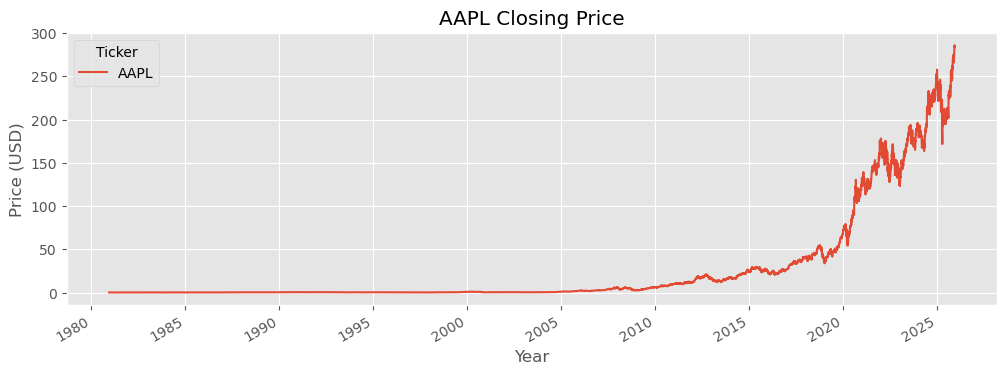

In [4]:
df['Close'].plot(figsize=(12,4), title="AAPL Closing Price")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()


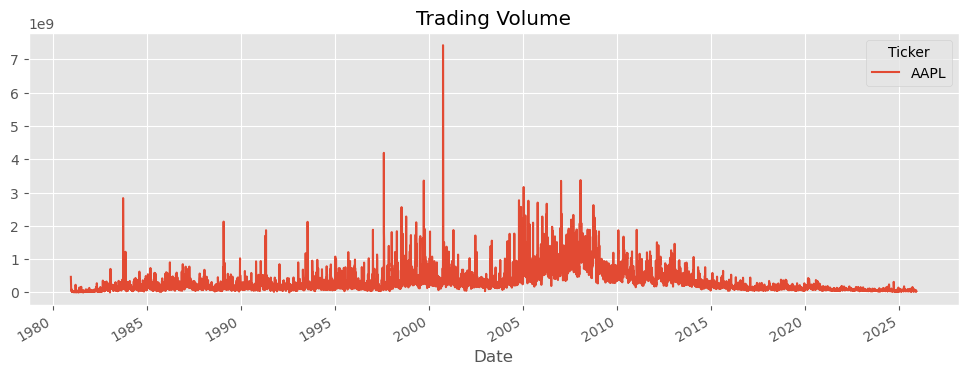

In [5]:
df['Volume'].plot(figsize=(12,4), title="Trading Volume")
plt.show()


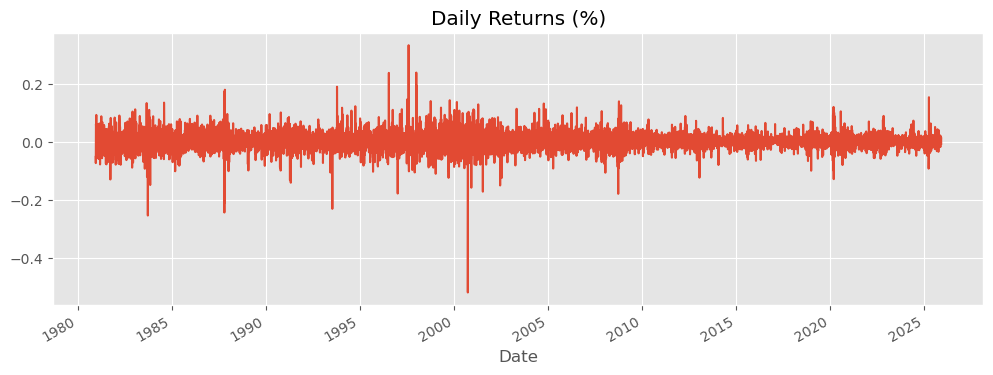

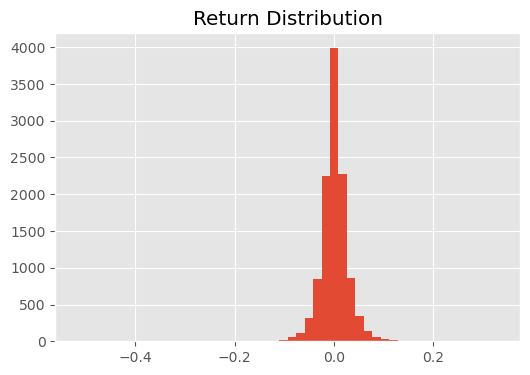

In [6]:
df['Returns'] = df['Close'].pct_change()
df['Returns'].plot(figsize=(12,4), title="Daily Returns (%)")
plt.show()

df['Returns'].hist(bins=50, figsize=(6,4))
plt.title("Return Distribution")
plt.show()


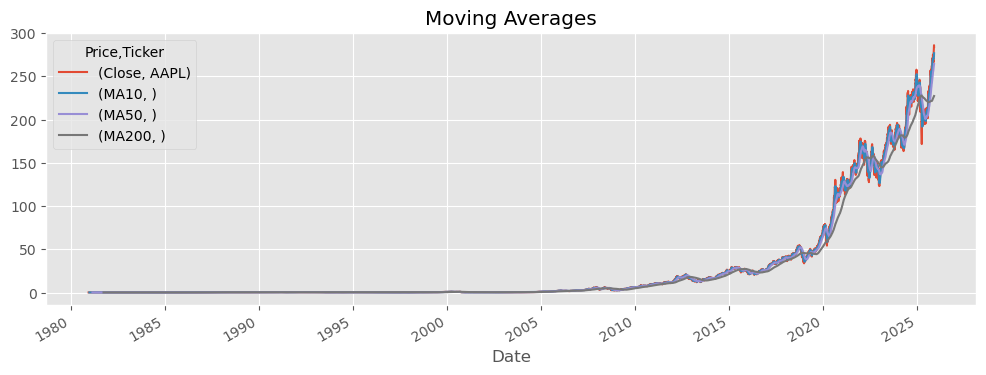

In [7]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

df[['Close', 'MA10', 'MA50', 'MA200']].plot(figsize=(12,4),
                                            title="Moving Averages")
plt.show()


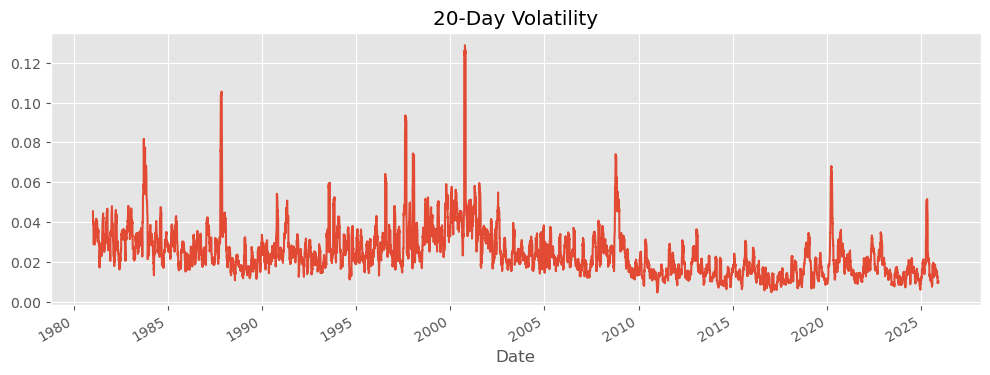

In [8]:
df['Volatility'] = df['Returns'].rolling(20).std()

df['Volatility'].plot(figsize=(12,4), title="20-Day Volatility")
plt.show()


In [9]:
df.isna().sum()


Price       Ticker
Close       AAPL        0
High        AAPL        0
Low         AAPL        0
Open        AAPL        0
Volume      AAPL        0
Returns                 1
MA10                    9
MA50                   49
MA200                 199
Volatility             20
dtype: int64

In [10]:
df.tail()


Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,MA200,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-11-26,277.549988,279.529999,276.630005,276.959991,33431400,0.002094,271.700000,261.634909,226.545440,0.009462
2025-11-28,278.850006,279.000000,275.989990,277.260010,20135600,0.004684,272.289999,262.458916,226.759376,0.009426
2025-12-01,283.100006,283.420013,276.140015,278.010010,46587700,0.015241,273.359000,263.215672,226.971341,0.009821
2025-12-02,286.190002,287.399994,282.630005,283.000000,53669500,0.010915,275.232001,263.822832,227.183459,0.009840
2025-12-03,284.149994,288.619995,283.299988,286.200012,43497200,-0.007128,276.903000,264.422160,227.386025,0.010105


In [12]:
!pip install pandas-ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 531.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 641.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: pandas━━━━━━━━━━━━━━━━━━ 0/4 [numpy]
    Found existing installation: pandas 2.2.3 0/4 [numpy]
    Uninstalling pandas-2.2.3:0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [pandas]
      Successfully uninstalled pandas-2.2.3━━━━━━━━━━━━━━━━━━━ 1/4 [pandas]
  Attempting uninstall: numba━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [pandas]
    Found existing installation: numba 0.61.0━━━━━━━━━━━━━━━━━ 1/4 [pandas]
    Uninstalling numba-0.61.0:90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [pandas]
      Successfully uninstalled numba-0.61.0━━━━━━━━━━━━━━━━━━━ 1/4 [pandas]
   ━━━━━━━━━━━━━━━

In [70]:
# show columns, types, and first rows
print("Columns list:")
print(df.columns.tolist())

print("\nColumn dtype sample:")
print(df.dtypes)

print("\nFirst 5 rows (columns header and values):")
display(df.head())


Columns list:
[('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL'), ('Returns', ''), ('MA10', ''), ('MA50', ''), ('MA200', ''), ('Volatility', ''), ('SMA_10', ''), ('SMA_50', ''), ('EMA_12', ''), ('RSI', ''), ('Returns_log', ''), ('EMA_10', ''), ('EMA_20', ''), ('RSI_14', ''), ('EMA_26', ''), ('MACD', ''), ('MACD_signal', ''), ('Volume_change', ''), ('Volume_norm', '')]

Column dtype sample:
Price          Ticker
Close          AAPL      float64
High           AAPL      float64
Low            AAPL      float64
Open           AAPL      float64
Volume         AAPL        int64
Returns                  float64
MA10                     float64
MA50                     float64
MA200                    float64
Volatility               float64
SMA_10                   float64
SMA_50                   float64
EMA_12                   float64
RSI                       object
Returns_log              float64
EMA_10                   float64
EMA_20          

Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,MA200,Volatility,...,RSI,Returns_log,EMA_10,EMA_20,RSI_14,EMA_26,MACD,MACD_signal,Volume_change,Volume_norm
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12,0.098389,0.098817,0.098389,0.098389,469033600,-0.052170,0.099416,0.101632,0.090553,0.045321,...,None,NaN,0.098389,0.098389,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.093256,0.093684,0.093256,0.093684,175884800,-0.052170,0.099416,0.101632,0.090553,0.045321,...,None,NaN,0.097456,0.097901,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.086412,0.086839,0.086412,0.086839,105728000,-0.073398,0.099416,0.101632,0.090553,0.045321,...,None,NaN,0.095448,0.096806,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.088550,0.088978,0.088550,0.088550,86441600,0.024751,0.099416,0.101632,0.090553,0.045321,...,None,NaN,0.094194,0.096020,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.091118,0.091545,0.091118,0.091118,73449600,0.028992,0.099416,0.101632,0.090553,0.045321,...,None,NaN,0.093635,0.095553,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]

print(df.columns.tolist())


['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Returns_', 'MA10_', 'MA50_', 'MA200_', 'Volatility_', 'SMA_10_', 'SMA_50_', 'EMA_12_', 'RSI_', 'Returns_log_', 'EMA_10_', 'EMA_20_', 'RSI_14_', 'EMA_26_', 'MACD_', 'MACD_signal_', 'Volume_change_', 'Volume_norm_']


In [72]:
df.rename(columns={
    'Close_AAPL': 'Close',
    'High_AAPL': 'High',
    'Low_AAPL': 'Low',
    'Open_AAPL': 'Open',
    'Volume_AAPL': 'Volume'
}, inplace=True)


In [73]:
# Returns
df['Returns'] = df['Close'].pct_change()
df['Returns_log'] = np.log(df['Close'] / df['Close'].shift(1))

# EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI 14
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_RSI(df['Close'])


In [74]:
df[['Close','Returns','EMA_12','EMA_26','MACD','MACD_signal','RSI_14']].isna().sum()


Close           0
Returns         1
EMA_12          0
EMA_26          0
MACD            0
MACD_signal     0
RSI_14         13
dtype: int64

In [78]:
# Drop columns ending with "_" OR having more than 100 NaNs
cols_to_drop = [col for col in df.columns 
                if col.endswith("_") or df[col].isna().sum() > 100]

df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_signal', 'RSI_14'],
      dtype='object')

In [79]:
df.isna().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Returns         1
Returns_log     1
EMA_12          0
EMA_26          0
MACD            0
MACD_signal     0
RSI_14         13
dtype: int64

In [80]:
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()
df["Volatility"] = df["Returns"].rolling(window=20).std()
df.isna().sum()

Close             0
High              0
Low               0
Open              0
Volume            0
Returns           1
Returns_log       1
EMA_12            0
EMA_26            0
MACD              0
MACD_signal       0
RSI_14           13
SMA_10            9
SMA_50           49
Volume_change     1
Volume_norm       0
Volatility       20
dtype: int64

In [85]:
print(df.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_signal', 'RSI_14', 'SMA_10', 'SMA_50',
       'Volume_change', 'Volume_norm', 'Volatility'],
      dtype='object')


In [89]:
low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()


In [90]:
df.isna().sum()

Close             0
High              0
Low               0
Open              0
Volume            0
Returns           1
Returns_log       1
EMA_12            0
EMA_26            0
MACD              0
MACD_signal       0
RSI_14           13
SMA_10            9
SMA_50           49
Volume_change     1
Volume_norm       0
Volatility       20
Stoch_K          13
Stoch_D          15
dtype: int64

In [91]:
df.dropna(inplace=True)
print(df.shape)


(11287, 19)


In [92]:
df.isna().sum()

Close            0
High             0
Low              0
Open             0
Volume           0
Returns          0
Returns_log      0
EMA_12           0
EMA_26           0
MACD             0
MACD_signal      0
RSI_14           0
SMA_10           0
SMA_50           0
Volume_change    0
Volume_norm      0
Volatility       0
Stoch_K          0
Stoch_D          0
dtype: int64

In [93]:
# 1. Middle Band: SMA 20
df['BB_Middle'] = df['Close'].rolling(window=20).mean()

# 2. Standard deviation of last 20 days
df['BB_STD'] = df['Close'].rolling(window=20).std()

# 3. Upper Band
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']

# 4. Lower Band
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']

# 5. Bollinger Band Width (normalized)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

# 6. %B (Position of close relative to bands)
df['BB_Percent'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11287 entries, 1981-02-24 to 2025-12-03
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          11287 non-null  float64
 1   High           11287 non-null  float64
 2   Low            11287 non-null  float64
 3   Open           11287 non-null  float64
 4   Volume         11287 non-null  int64  
 5   Returns        11287 non-null  float64
 6   Returns_log    11287 non-null  float64
 7   EMA_12         11287 non-null  float64
 8   EMA_26         11287 non-null  float64
 9   MACD           11287 non-null  float64
 10  MACD_signal    11287 non-null  float64
 11  RSI_14         11287 non-null  float64
 12  SMA_10         11287 non-null  float64
 13  SMA_50         11287 non-null  float64
 14  Volume_change  11287 non-null  float64
 15  Volume_norm    11287 non-null  float64
 16  Volatility     11287 non-null  float64
 17  Stoch_K        11287 non-null  fl

DataFrame shape BEFORE final cleanup: (11287, 26)
DataFrame shape AFTER final cleanup: (11268, 26)


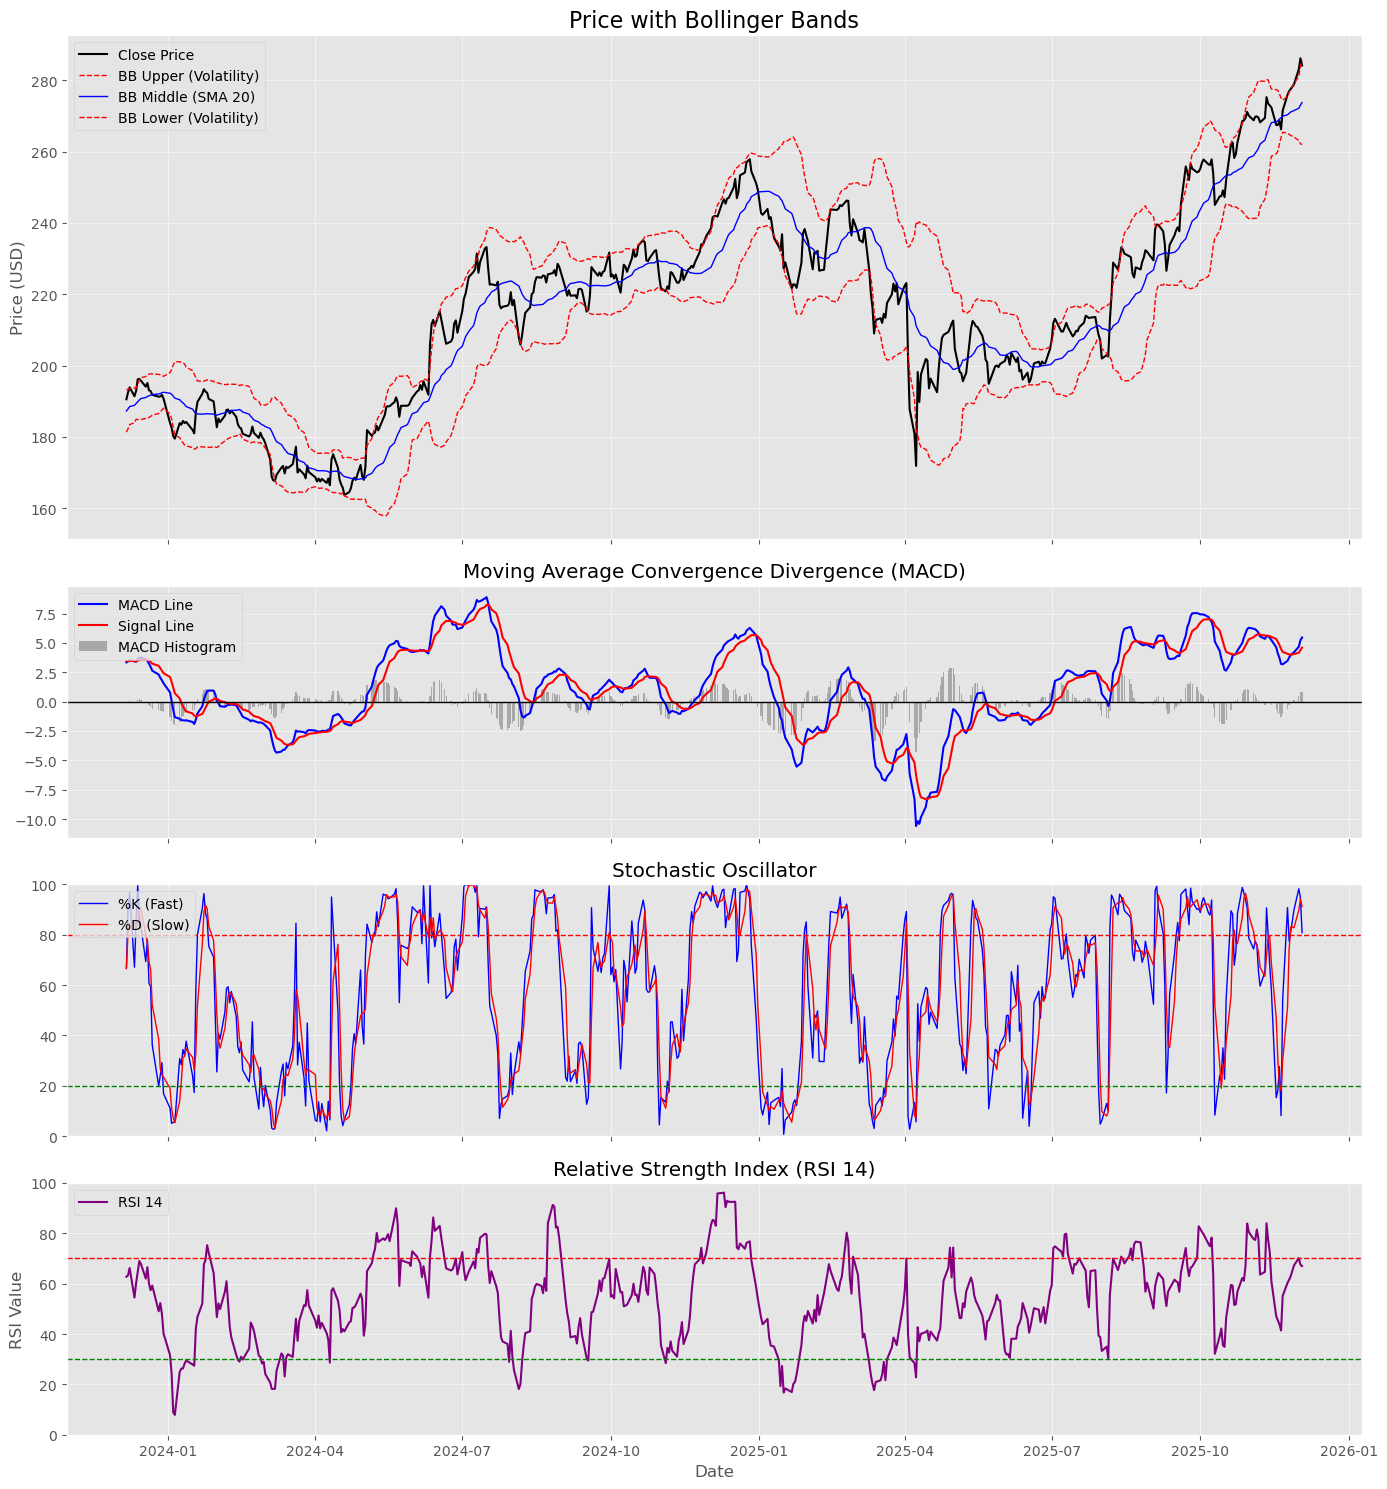

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Recalculate MACD Histogram and Cleanup ---
# Re-ensure the MACD Histogram feature is available
# (Assuming 'MACD' and 'MACD_signal' already exist with lowercase 's')
df['MACD_Hist'] = df['MACD'] - df['MACD_signal']

# Final cleanup to remove the 19 rows with NaN values (e.g., from Bollinger Bands)
print(f"DataFrame shape BEFORE final cleanup: {df.shape}")
df.dropna(inplace=True)
print(f"DataFrame shape AFTER final cleanup: {df.shape}")


# --- 2. Visualization (with corrected column name) ---

# Use the 'ggplot' style for clear visuals
plt.style.use('ggplot') 

# Select the last 500 days for plotting to see recent trends clearly
plot_df = df.tail(500).copy()

# Create a figure with 4 subplots, sharing the X-axis (Date)
fig, axes = plt.subplots(4, 1, figsize=(14, 15), sharex=True, 
                         gridspec_kw={'height_ratios': [3, 1.5, 1.5, 1.5]})

# --- Plot 1: Price and Bollinger Bands (Volatility) ---
axes[0].plot(plot_df.index, plot_df['Close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(plot_df.index, plot_df['BB_Upper'], label='BB Upper (Volatility)', color='red', linestyle='--', linewidth=1)
axes[0].plot(plot_df.index, plot_df['BB_Middle'], label='BB Middle (SMA 20)', color='blue', linewidth=1)
axes[0].plot(plot_df.index, plot_df['BB_Lower'], label='BB Lower (Volatility)', color='red', linestyle='--', linewidth=1)
axes[0].set_title('Price with Bollinger Bands', fontsize=16)
axes[0].set_ylabel('Price (USD)')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.5)


# --- Plot 2: MACD (Momentum/Trend) ---
# FIX: The column name is corrected to 'MACD_signal' (lowercase 's')
axes[1].plot(plot_df.index, plot_df['MACD'], label='MACD Line', color='blue', linewidth=1.5)
axes[1].plot(plot_df.index, plot_df['MACD_signal'], label='Signal Line', color='red', linewidth=1.5) 
axes[1].bar(plot_df.index, plot_df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.6)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1) # Zero line reference
axes[1].set_title('Moving Average Convergence Divergence (MACD)')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.5)

# --- Plot 3: Stochastic Oscillator (%K, %D) (Momentum) ---
axes[2].plot(plot_df.index, plot_df['Stoch_K'], label='%K (Fast)', color='blue', linewidth=1)
axes[2].plot(plot_df.index, plot_df['Stoch_D'], label='%D (Slow)', color='red', linewidth=1)
axes[2].axhline(80, color='red', linestyle='--', linewidth=1) # Overbought (80) line
axes[2].axhline(20, color='green', linestyle='--', linewidth=1) # Oversold (20) line
axes[2].set_title('Stochastic Oscillator')
axes[2].set_ylim(0, 100)
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.5)


# --- Plot 4: RSI (Relative Strength Index) (Momentum) ---
axes[3].plot(plot_df.index, plot_df['RSI_14'], label='RSI 14', color='purple', linewidth=1.5)
axes[3].axhline(70, color='red', linestyle='--', linewidth=1) # Overbought (70) line
axes[3].axhline(30, color='green', linestyle='--', linewidth=1) # Oversold (30) line
axes[3].set_title('Relative Strength Index (RSI 14)')
axes[3].set_ylabel('RSI Value')
axes[3].set_xlabel('Date')
axes[3].set_ylim(0, 100)
axes[3].legend(loc='upper left')
axes[3].grid(True, alpha=0.5)


plt.tight_layout()
plt.show()

In [99]:
# Lagged returns
df['Returns_1D'] = df['Returns'].shift(1)
df['Returns_5D'] = df['Returns'].shift(5)
df['Returns_10D'] = df['Returns'].shift(10)

df['Target_UpDown'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)
df['Volume_Mean_20'] = df['Volume'].rolling(20).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_Mean_20']
df['Returns_Mean_5'] = df['Returns'].rolling(5).mean()
df['Returns_Mean_20'] = df['Returns'].rolling(20).mean()


In [2]:
df.info()

NameError: name 'df' is not defined

In [3]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",
    interval="1d",
    auto_adjust=True
)



df.to_csv("AAPL_daily_full_history.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df['Returns'] = df['Close'].pct_change()

df['Returns'].hist(bins=50, figsize=(6,4)) df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['Volatility'] = df['Returns'].rolling(20).std() # Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]
# Returns
df['Returns'] = df['Close'].pct_change()
df['Returns_log'] = np.log(df['Close'] / df['Close'].shift(1))

# EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI 14
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_RSI(df['Close'])# Drop columns ending with "_" OR having more than 100 NaNs
cols_to_drop = [col for col in df.columns 
                if col.endswith("_") or df[col].isna().sum() > 100]

df.drop(columns=cols_to_drop, inplace=True)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()
df["Volatility"] = df["Returns"].rolling(window=20).std() low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()
# 1. Middle Band: SMA 20
df['BB_Middle'] = df['Close'].rolling(window=20).mean()

# 2. Standard deviation of last 20 days
df['BB_STD'] = df['Close'].rolling(window=20).std()

# 3. Upper Band
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']

# 4. Lower Band
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']

# 5. Bollinger Band Width (normalized)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

# 6. %B (Position of close relative to bands)
df['BB_Percent'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])

SyntaxError: invalid syntax (1142747448.py, line 22)

In [4]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",
    interval="1d",
    auto_adjust=True
)



df.to_csv("AAPL_daily_full_history.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df['Returns'] = df['Close'].pct_change()


df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['Volatility'] = df['Returns'].rolling(20).std() # Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]
# Returns
df['Returns'] = df['Close'].pct_change()
df['Returns_log'] = np.log(df['Close'] / df['Close'].shift(1))

# EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI 14
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_RSI(df['Close'])# Drop columns ending with "_" OR having more than 100 NaNs
cols_to_drop = [col for col in df.columns 
                if col.endswith("_") or df[col].isna().sum() > 100]

df.drop(columns=cols_to_drop, inplace=True)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()
df["Volatility"] = df["Returns"].rolling(window=20).std() low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()
# 1. Middle Band: SMA 20
df['BB_Middle'] = df['Close'].rolling(window=20).mean()

# 2. Standard deviation of last 20 days
df['BB_STD'] = df['Close'].rolling(window=20).std()

# 3. Upper Band
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']

# 4. Lower Band
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']

# 5. Bollinger Band Width (normalized)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

# 6. %B (Position of close relative to bands)
df['BB_Percent'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])

SyntaxError: invalid syntax (2811236966.py, line 58)

In [5]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",
    interval="1d",
    auto_adjust=True
)



df.to_csv("AAPL_daily_full_history.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df['Returns'] = df['Close'].pct_change()


df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['Volatility'] = df['Returns'].rolling(20).std() # Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]
# Returns
df['Returns'] = df['Close'].pct_change()
df['Returns_log'] = np.log(df['Close'] / df['Close'].shift(1))

# EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI 14
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_RSI(df['Close'])# Drop columns ending with "_" OR having more than 100 NaNs
cols_to_drop = [col for col in df.columns 
                if col.endswith("_") or df[col].isna().sum() > 100]

df.drop(columns=cols_to_drop, inplace=True)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()
df["Volatility"] = df["Returns"].rolling(window=20).std() 
low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()
# 1. Middle Band: SMA 20
df['BB_Middle'] = df['Close'].rolling(window=20).mean()

# 2. Standard deviation of last 20 days
df['BB_STD'] = df['Close'].rolling(window=20).std()

# 3. Upper Band
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']

# 4. Lower Band
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']

# 5. Bollinger Band Width (normalized)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

# 6. %B (Position of close relative to bands)
df['BB_Percent'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])

ModuleNotFoundError: No module named 'yfinance'

In [6]:
import yfinance as yf

ticker = "AAPL"

df = yf.download(
    ticker,
    period="max",
    interval="1d",
    auto_adjust=True
)



df.to_csv("AAPL_daily_full_history.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df['Returns'] = df['Close'].pct_change()


df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['Volatility'] = df['Returns'].rolling(20).std() # Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]
# Returns
df['Returns'] = df['Close'].pct_change()
df['Returns_log'] = np.log(df['Close'] / df['Close'].shift(1))

# EMAs
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI 14
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_RSI(df['Close'])# Drop columns ending with "_" OR having more than 100 NaNs
cols_to_drop = [col for col in df.columns 
                if col.endswith("_") or df[col].isna().sum() > 100]

df.drop(columns=cols_to_drop, inplace=True)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()
df["Volatility"] = df["Returns"].rolling(window=20).std() 
low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()
# 1. Middle Band: SMA 20
df['BB_Middle'] = df['Close'].rolling(window=20).mean()

# 2. Standard deviation of last 20 days
df['BB_STD'] = df['Close'].rolling(window=20).std()

# 3. Upper Band
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_STD']

# 4. Lower Band
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_STD']

# 5. Bollinger Band Width (normalized)
df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']

# 6. %B (Position of close relative to bands)
df['BB_Percent'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])

ModuleNotFoundError: No module named 'yfinance'

In [7]:
!pip install yfinance


  Using cached yfinance-0.2.66-py2.py3-none-any.whl.metadata (6.0 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached peewee-3.18.3.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (13 kB)
Using cached yfinance-0.2.66-py2.py3-none-any.whl (123 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl (3.0 MB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=06ccfd1153d6a0a9e196dc3ee7fa274186989b2e56b017bd7d0dd0b6c18b70f9
  Stored in directory: /Users/poojakumari/Library/Caches/pip/wheels/42/d6/84/bf57a755f4569494cd00de4bb46ef064874823f4d19c82e960
  Created wheel for peewee: filename=peewee-3.18.3-cp311-cp311-macosx_11_0_arm64.whl size=271370 sha256=627bbd4db

In [8]:
import pandas as pd
df = pd.read_csv("AAPL_daily_full_history.csv", index_col=0, parse_dates=True)
df.head()


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/1263191661.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_daily_full_history.csv", index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN
1980-12-12,0.09838945418596268,0.09881721068161238,0.09838945418596268,0.09838945418596268,469033600
1980-12-15,0.09325645864009857,0.09368421533033078,0.09325645864009857,0.09368421533033078,175884800
1980-12-16,0.08641161769628525,0.08683936860447428,0.08641161769628525,0.08683936860447428,105728000


In [10]:
df.to_csv("AAPL_clean.csv")


In [11]:
df = pd.read_csv("AAPL_clean.csv", index_col=0, parse_dates=True)


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/2615693724.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_clean.csv", index_col=0, parse_dates=True)


In [12]:
import pandas as pd

df = pd.read_csv(
    "AAPL_daily_full_history.csv",
    header=[0,1],        # because two header rows exist
    index_col=0,         # Date column is the index
    parse_dates=[0]      # parse date index properly
)

df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098389,0.098817,0.098389,0.098389,469033600
1980-12-15,0.093256,0.093684,0.093256,0.093684,175884800
1980-12-16,0.086412,0.086839,0.086412,0.086839,105728000
1980-12-17,0.088550,0.088978,0.088550,0.088550,86441600
1980-12-18,0.091118,0.091545,0.091118,0.091118,73449600


In [13]:
df.columns = [col[0] for col in df.columns]  # keep only "Close","High","Low"...
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098389,0.098817,0.098389,0.098389,469033600
1980-12-15,0.093256,0.093684,0.093256,0.093684,175884800
1980-12-16,0.086412,0.086839,0.086412,0.086839,105728000
1980-12-17,0.088550,0.088978,0.088550,0.088550,86441600
1980-12-18,0.091118,0.091545,0.091118,0.091118,73449600


In [14]:
df.columns = [col[0] for col in df.columns]  # keep only Close, Open, Volume etc.


In [15]:
df["Returns"] = df["Close"].pct_change()
df["Returns_log"] = np.log(df["Close"] / df["Close"].shift(1))


KeyError: 'Close'

In [16]:
df.columns


Index(['C', 'H', 'L', 'O', 'V'], dtype='object')

In [17]:
df = df.rename(columns={
    "C": "Close",
    "H": "High",
    "L": "Low",
    "O": "Open",
    "V": "Volume"
})


In [18]:
df.columns


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [19]:
df["Returns"] = df["Close"].pct_change()
df["Returns_log"] = np.log(df["Close"] / df["Close"].shift(1))


In [20]:
df["SMA_10"] = df["Close"].rolling(10).mean()
df["SMA_50"] = df["Close"].rolling(50).mean()
df["MA50"] = df["Close"].rolling(50).mean()
df["MA200"] = df["Close"].rolling(200).mean()


In [21]:
df["Volatility"] = df["Returns"].rolling(20).std()


In [22]:
df["Volume_change"] = df["Volume"].pct_change()
df["Volume_norm"] = (df["Volume"] - df["Volume"].mean()) / df["Volume"].std()


In [23]:
df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()


In [24]:
def compute_RSI(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    return 100 - 100/(1+rs)

df["RSI_14"] = compute_RSI(df["Close"])


In [25]:
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()


In [26]:
low14 = df["Low"].rolling(14).min()
high14 = df["High"].rolling(14).max()

df["Stoch_K"] = 100 * (df["Close"] - low14) / (high14 - low14)
df["Stoch_D"] = df["Stoch_K"].rolling(3).mean()


In [27]:
df["BB_Middle"] = df["Close"].rolling(20).mean()
df["BB_STD"] = df["Close"].rolling(20).std()

df["BB_Upper"] = df["BB_Middle"] + 2 * df["BB_STD"]
df["BB_Lower"] = df["BB_Middle"] - 2 * df["BB_STD"]

df["BB_Width"] = (df["BB_Upper"] - df["BB_Lower"]) / df["BB_Middle"]
df["BB_Percent"] = (df["Close"] - df["BB_Lower"]) / (df["BB_Upper"] - df["BB_Lower"])


In [28]:
df.dropna(inplace=True)
print(df.shape)


(11137, 27)


In [30]:
# Lagged returns
df['Returns_1D'] = df['Returns'].shift(1)
df['Returns_5D'] = df['Returns'].shift(5)
df['Returns_10D'] = df['Returns'].shift(10)


In [31]:
df['Target_UpDown'] = (df['Close'].shift(-1) > df['Close']).astype(int)


In [32]:
df['Volume_Mean_20'] = df['Volume'].rolling(20).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_Mean_20']


In [33]:
df['Returns_Mean_5'] = df['Returns'].rolling(5).mean()
df['Returns_Mean_20'] = df['Returns'].rolling(20).mean()


In [34]:
df.dropna(inplace=True)


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select all feature columns except the target
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']]

# Fit on training data later — for now just prepare
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

print("Scaling completed. Scaled shape:", df_scaled.shape)


Scaling completed. Scaled shape: (11118, 35)


In [38]:
df["Bullish_Engulfing"] = (
    (df["Close"] > df["Open"]) &                      # today's candle is green
    (df["Close"].shift(1) < df["Open"].shift(1)) &    # previous candle was red
    (df["Close"] > df["Open"].shift(1)) &             # today's close > previous open
    (df["Open"] < df["Close"].shift(1))               # today's open < previous close
).astype(int)


In [39]:
df["Bearish_Engulfing"] = (
    (df["Close"] < df["Open"]) &
    (df["Close"].shift(1) > df["Open"].shift(1)) &
    (df["Close"] < df["Open"].shift(1)) &
    (df["Open"] > df["Close"].shift(1))
).astype(int)
df["Hammer"] = (
    ((df["High"] - df["Close"]) <= (df["Close"] - df["Low"]) * 0.25) &
    ((df["Open"] - df["Low"]) >= 2 * (df["High"] - df["Close"]))
).astype(int)
df["Shooting_Star"] = (
    ((df["Close"] - df["Low"]) <= (df["High"] - df["Close"]) * 0.25) &
    ((df["High"] - df["Open"]) >= 2 * (df["Close"] - df["Low"]))
).astype(int)


In [40]:
df.dropna(inplace=True)


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop("Target_UpDown", axis=1)
y = df["Target_UpDown"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [43]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log',
       'SMA_10', 'SMA_50', 'MA50', 'MA200', 'Volatility', 'Volume_change',
       'Volume_norm', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_signal',
       'Stoch_K', 'Stoch_D', 'BB_Middle', 'BB_STD', 'BB_Upper', 'BB_Lower',
       'BB_Width', 'BB_Percent', 'Returns_1D', 'Returns_5D', 'Returns_10D',
       'Target_UpDown', 'Volume_Mean_20', 'Volume_Ratio', 'Returns_Mean_5',
       'Returns_Mean_20', 'Bullish_Engulfing', 'Bearish_Engulfing', 'Hammer',
       'Shooting_Star'],
      dtype='object')

In [46]:
window_size = 60
features = df.drop(columns=["Target_UpDown"]).values
labels = df["Target_UpDown"].values
import numpy as np

def create_sequences(features, labels, window):
    X, y = [], []
    for i in range(window, len(features)):
        X.append(features[i-window:i])
        y.append(labels[i])
    return np.array(X), np.array(y)

X, y = create_sequences(features, labels, window_size)


In [47]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [49]:
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 1.0 MB/s  0:01:05m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 835.1 kB/s  0:00:07 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 813.3 kB/s  0:00:000:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [torch]32m5/6 [torch]kx]


In [50]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)


In [53]:
import torch
import torch.nn as nn

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(StockLSTM, self).__init__()

        # LSTM Layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Fully Connected Layer (output 2 classes: Up or Down)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        # LSTM output
        out, _ = self.lstm(x)

        # Out contains results for ALL 60 timesteps
        # We take ONLY the last timestep (the prediction one)
        last_out = out[:, -1, :]

        # Pass into final linear layer
        out = self.fc(last_out)
        return out


In [54]:
input_size = X_train.shape[2]  # number of features
model = StockLSTM(input_size=input_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 2/20, Loss: 0.6948
Epoch 4/20, Loss: 0.6931
Epoch 6/20, Loss: 0.6944
Epoch 8/20, Loss: 0.6937
Epoch 10/20, Loss: 0.6929
Epoch 12/20, Loss: 0.6928
Epoch 14/20, Loss: 0.6930
Epoch 16/20, Loss: 0.6930
Epoch 18/20, Loss: 0.6928
Epoch 20/20, Loss: 0.6926


In [55]:
#self evaluation
model.eval()
with torch.no_grad():
    preds = model(X_test)
    predicted_classes = torch.argmax(preds, dim=1)

accuracy = (predicted_classes == y_test).float().mean()
print("Test Accuracy:", accuracy.item())


Test Accuracy: 0.5262206196784973


In [57]:
!pip install seaborn


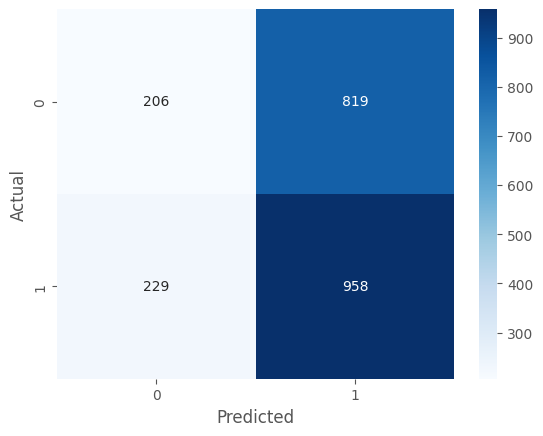

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted_classes)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

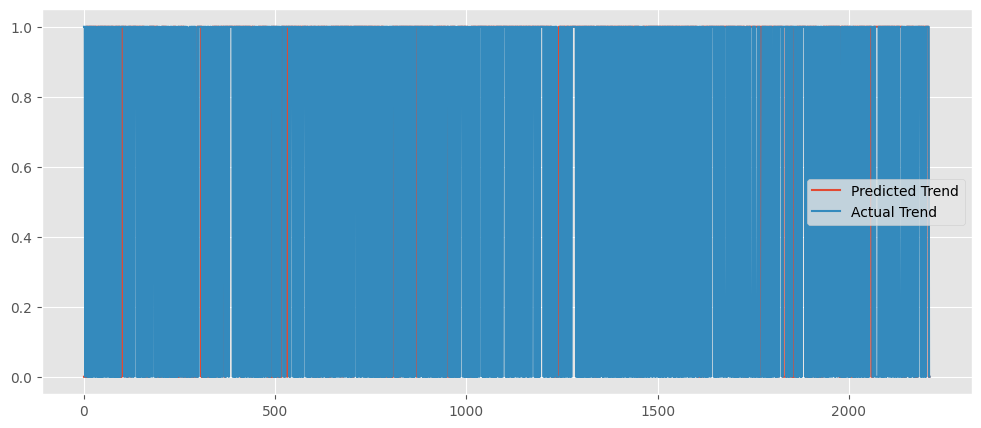

In [59]:
plt.figure(figsize=(12,5))
plt.plot(predicted_classes.numpy(), label="Predicted Trend")
plt.plot(y_test.numpy(), label="Actual Trend")
plt.legend()
plt.show()


In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- 1. Define Features and Labels (Non-Sequential) ---
# Assuming you successfully created the Target_UpDown classification column.
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']]
features_full = df[feature_cols].values
labels_full = df["Target_UpDown"].values

# --- 2. Chronological Split (Flat Data) ---
# Calculate the split point for the features and labels
split_idx = int(0.8 * len(features_full))

X_train_flat, X_test_flat = features_full[:split_idx], features_full[split_idx:]
y_train_flat, y_test_flat = labels_full[:split_idx], labels_full[split_idx:]


# --- 3. CORRECT SCALING (Preventing Data Leakage) ---

scaler = MinMaxScaler(feature_range=(0, 1))

# FIT the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train_flat)

# TRANSFORM both the training and test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test_flat)


# --- 4. Sequence Creation Function ---
def create_sequences(features_array, labels_array, window):
    X, y = [], []
    for i in range(window, len(features_array)):
        # X: Lookback window (features from i-window to i-1)
        X.append(features_array[i-window:i])
        # y: The label/target corresponding to time step i
        y.append(labels_array[i])
    return np.array(X), np.array(y)

# Set your desired lookback window
window_size = 60 

# --- 5. Create Sequences (The final X_train, X_test for the LSTM) ---
# Note: We must adjust the labels used for sequence creation to account for the lookback shift
y_train_seq = y_train_flat[window_size:]
y_test_seq = y_test_flat[window_size:]

X_train, y_train = create_sequences(X_train_scaled, y_train_flat, window_size)
X_test, y_test = create_sequences(X_test_scaled, y_test_flat, window_size)


print("\n--- Final Data Shape Check ---")
print(f"X_train shape (Samples, Timesteps, Features): {X_train.shape}")
print(f"y_train shape (Samples): {y_train.shape}")
print(f"X_test shape (Samples, Timesteps, Features): {X_test.shape}")
print(f"y_test shape (Samples): {y_test.shape}")


--- Final Data Shape Check ---
X_train shape (Samples, Timesteps, Features): (8834, 60, 38)
y_train shape (Samples): (8834,)
X_test shape (Samples, Timesteps, Features): (2164, 60, 38)
y_test shape (Samples): (2164,)


In [61]:
import torch
import torch.nn as nn

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(StockLSTM, self).__init__()

        # LSTM Layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Fully Connected Layer (output 2 classes: Up or Down)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        # LSTM output
        out, _ = self.lstm(x)

        # Out contains results for ALL 60 timesteps
        # We take ONLY the last timestep (the prediction one)
        last_out = out[:, -1, :]

        # Pass into final linear layer
        out = self.fc(last_out)
        return out


In [63]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- 1. Model Definition (No changes needed, structure is correct) ---
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 2) # Output 2 classes: Up or Down

    def forward(self, x):
        out, _ = self.lstm(x)
        # Take ONLY the output of the last timestep for sequence-to-one prediction
        last_out = out[:, -1, :]
        out = self.fc(last_out)
        return out

# --- 2. Corrected Data Preparation and Scaling (Fixing Data Leakage) ---

# Define Features and Labels (Non-Sequential)
# Assuming your final classification column is named 'Target_UpDown'
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']]
features_full = df[feature_cols].values
labels_full = df["Target_UpDown"].values

# Chronological Split Index (80% train, 20% test on flat data)
split_idx = int(0.8 * len(features_full))

X_train_flat, X_test_flat = features_full[:split_idx], features_full[split_idx:]
y_train_flat, y_test_flat = labels_full[:split_idx], labels_full[split_idx:]

# CORRECT SCALING (Fit ONLY on Training Data to prevent leakage)
scaler = MinMaxScaler(feature_range=(0, 1))

# FIT the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train_flat)

# TRANSFORM both the training and test data
X_test_scaled = scaler.transform(X_test_flat)

# Sequence Creation Function
def create_sequences(features_array, labels_array, window):
    X, y = [], []
    for i in range(window, len(features_array)):
        # X: Lookback window (features from i-window to i-1)
        X.append(features_array[i-window:i])
        # y: The label/target corresponding to time step i
        y.append(labels_array[i])
    return np.array(X), np.array(y)

# Set Lookback Window
window_size = 60 

# Create Sequences 
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_flat, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_flat, window_size)

# Convert to Tensors
X_train = torch.from_numpy(X_train_seq).float()
y_train = torch.from_numpy(y_train_seq).long() # Classification target MUST be LongTensor
X_test = torch.from_numpy(X_test_seq).float()
y_test = torch.from_numpy(y_test_seq).long()

print(f"Final X_train shape: {X_train.shape}")
print(f"Final X_test shape: {X_test.shape}")


# --- 3. Training and Evaluation Loop ---

input_size = X_train.shape[2] 
model = StockLSTM(input_size=input_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20

print("\n--- Model Training Starting ---")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- Self-Evaluation on Test Set ---
model.eval()
with torch.no_grad():
    preds = model(X_test)
    predicted_classes = torch.argmax(preds, dim=1)

accuracy = (predicted_classes == y_test).float().mean()
print("\n--- Model Evaluation ---")
print(f"Test Accuracy: {accuracy.item():.4f}")

Final X_train shape: torch.Size([8834, 60, 38])
Final X_test shape: torch.Size([2164, 60, 38])

--- Model Training Starting ---
Epoch 2/20, Loss: 0.6931
Epoch 4/20, Loss: 0.6932
Epoch 6/20, Loss: 0.6928
Epoch 8/20, Loss: 0.6927
Epoch 10/20, Loss: 0.6927
Epoch 12/20, Loss: 0.6925
Epoch 14/20, Loss: 0.6925
Epoch 16/20, Loss: 0.6924
Epoch 18/20, Loss: 0.6923
Epoch 20/20, Loss: 0.6922

--- Model Evaluation ---
Test Accuracy: 0.5365


--- Confusion Matrix ---
[[   0 1003]
 [   0 1161]]
Accuracy: 0.5365
Precision (Class 1/Up): 0.5365
Recall (Class 1/Up): 1.0000


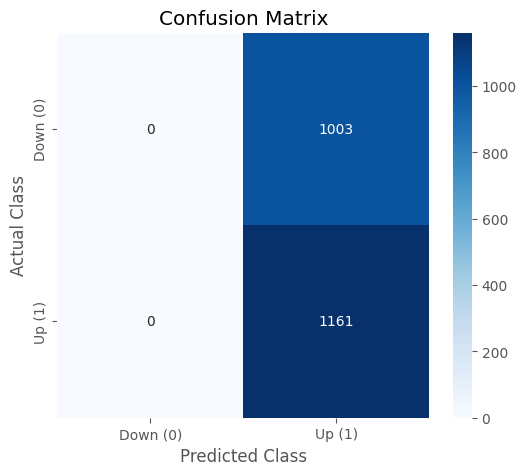

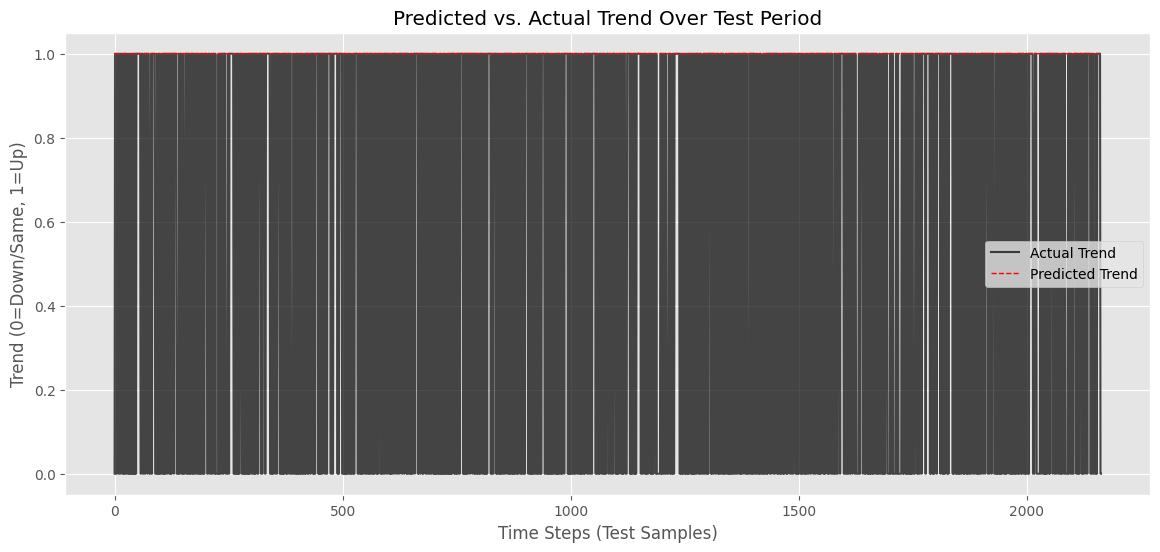

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert Tensors to NumPy arrays for scikit-learn compatibility
# We use .cpu() only if the tensors are on the GPU (safe to include for robustness)
y_test_np = y_test.cpu().numpy()
predicted_classes_np = predicted_classes.cpu().numpy()


# --- 1. Confusion Matrix and Performance Metrics ---

# Calculate the Confusion Matrix
cm = confusion_matrix(y_test_np, predicted_classes_np)

print("--- Confusion Matrix ---")
print(cm)
print(f"Accuracy: {accuracy_score(y_test_np, predicted_classes_np):.4f}")
print(f"Precision (Class 1/Up): {precision_score(y_test_np, predicted_classes_np, average='binary', pos_label=1):.4f}")
print(f"Recall (Class 1/Up): {recall_score(y_test_np, predicted_classes_np, average='binary', pos_label=1):.4f}")


# Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Down (0)', 'Up (1)'], yticklabels=['Down (0)', 'Up (1)'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


# --- 2. Predicted vs. Actual Trend Plot ---

plt.figure(figsize=(14, 6))
# Plot the actual up/down signals over the test period
plt.plot(y_test_np, label="Actual Trend", color='black', linewidth=1.5, alpha=0.7)
# Plot the model's predictions (often noisy and requires smoothing/downsampling for visualization)
plt.plot(predicted_classes_np, label="Predicted Trend", color='red', linestyle='--', linewidth=1)
plt.title("Predicted vs. Actual Trend Over Test Period")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("Trend (0=Down/Same, 1=Up)")
plt.legend()
plt.show()

In [65]:
import torch
import torch.nn as nn
import numpy as np
import math

class PositionalEncoding(nn.Module):
    """
    Standard Positional Encoding layer for Transformer input.
    Adds a learned or fixed encoding to the input features to convey sequence order.
    """
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: (Sequence Length, Batch Size, Feature Dim) or (Batch Size, Sequence Length, Feature Dim)
        # Assuming batch_first=True, we transpose x for PE compatibility
        x = x + self.pe[:x.size(1), :].transpose(0, 1)
        return x

In [66]:
class StockTransformer(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, nhead=4, dropout=0.1, num_classes=2):
        super(StockTransformer, self).__init__()
        
        # 1. Feature Embedding: Map input features to hidden_size (d_model)
        self.input_embed = nn.Linear(input_size, hidden_size)
        
        # 2. Positional Encoding
        self.pos_encoder = PositionalEncoding(d_model=hidden_size)
        
        # 3. Transformer Encoder Layer Definition
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size, 
            nhead=nhead, 
            dropout=dropout, 
            batch_first=True
        )
        
        # 4. Transformer Encoder Stack
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # 5. Classifier: Takes the output of the last time step
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x shape: (Batch Size, Sequence Length, Input Dim)
        
        # 1. Input Embedding
        x = self.input_embed(x)
        
        # 2. Positional Encoding
        x = self.pos_encoder(x)
        
        # 3. Transformer Encoder output
        out = self.transformer_encoder(x)
        
        # 4. Sequence-to-One Prediction: Take ONLY the last time step's output
        last_out = out[:, -1, :]
        
        # 5. Classifier
        out = self.fc(last_out)
        return out

In [67]:
# --- Replacement Code ---
# Assuming X_train has been created and converted to a tensor.
input_size = X_train.shape[2]  # number of features

# Instantiate the Transformer Model
# hidden_size=128 is a good starting point for a Transformer (larger than LSTM's 64)
new_model = StockTransformer(input_size=input_size, hidden_size=128, num_layers=2, nhead=4) 

# Re-define optimizer and criterion
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(new_model.parameters(), lr=0.0005) # Often lower LR for Transformers

# Now run your training loop using 'new_model'
# ...

In [70]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# --- 1. Setup ---

# Define Hyperparameters (adjust as needed)
NUM_EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.0005 

# FIX: Use the correctly defined tensor name X_train
input_size = X_train.shape[2] 

# Instantiate the NEW Transformer Model
new_model = StockTransformer(
    input_size=input_size, 
    hidden_size=128, 
    num_layers=2, 
    nhead=4, 
    num_classes=2 # Assuming 2 classes: Up/Down
) 

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(new_model.parameters(), lr=LEARNING_RATE)

# Create DataLoader for efficient batch processing
# FIX: Use the correctly defined tensor names X_train and y_train
train_data = TensorDataset(X_train, y_train.squeeze())
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)


# --- 2. The Training Loop ---
print(f"Starting training with the StockTransformer for {NUM_EPOCHS} epochs...")

# Move model to CPU (or GPU if available, though CPU is default here)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
new_model.to(device)
X_test_device = X_test.to(device)


for epoch in range(NUM_EPOCHS):
    new_model.train() # Set the model to training mode
    total_loss = 0
    
    for batch_x, batch_y in train_loader:
        # Move batch data to device
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        # 1. Zero the gradients
        optimizer.zero_grad()
        
        # 2. Forward pass: Get predictions
        outputs = new_model(batch_x.float())
        
        # 3. Calculate loss
        loss = criterion(outputs, batch_y.long()) 
        
        # 4. Backward pass: Compute gradients
        loss.backward()
        
        # 5. Update weights
        optimizer.step()
        
        total_loss += loss.item()
        
    avg_loss = total_loss / len(train_loader)
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}')

print("Training finished!")

# --- 3. Self-Evaluation on Test Set ---
new_model.eval()
with torch.no_grad():
    # Ensure X_test is on the same device as the model
    preds = new_model(X_test_device)
    predicted_classes = torch.argmax(preds, dim=1)
    
# Calculate accuracy
y_test_cpu = y_test.to("cpu")
predicted_classes_cpu = predicted_classes.to("cpu")
accuracy = (predicted_classes_cpu == y_test_cpu).float().mean()

print("\n--- Model Evaluation ---")
print(f"Test Accuracy: {accuracy.item():.4f}")

Starting training with the StockTransformer for 50 epochs...
Epoch [5/50], Loss: 0.6951
Epoch [10/50], Loss: 0.6931
Epoch [15/50], Loss: 0.6934
Epoch [20/50], Loss: 0.6930
Epoch [25/50], Loss: 0.6918
Epoch [30/50], Loss: 0.6911
Epoch [35/50], Loss: 0.6894
Epoch [40/50], Loss: 0.6889
Epoch [45/50], Loss: 0.6885
Epoch [50/50], Loss: 0.6892
Training finished!

--- Model Evaluation ---
Test Accuracy: 0.5365


In [77]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/poojakumari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [78]:
import pandas as pd
import numpy as np
import random
# We use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# as a simple, powerful, and easy-to-use lexicon-based sentiment analyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import datetime

# --- 1. SIMULATE EXTERNAL DATA SOURCING (Creating Placeholder Text) ---

# Define a set of "headlines" with varying sentiment polarity for demonstration
POSITIVE_HEADLINES = ["AAPL stock hits new all-time high after record earnings.", 
                      "Analyst upgrades Apple target price, calling it a strong buy.",
                      "iPhone sales exceed expectations, boosting investor confidence."]
NEGATIVE_HEADLINES = ["Regulatory pressure hits tech sector, leading to AAPL sell-off.", 
                      "Supply chain woes cause production delays for key product.",
                      "CEO transition uncertainty causes share price to tumble."]
NEUTRAL_HEADLINES = ["Apple announces minor software update in key market.",
                     "AAPL stock remains steady amidst quiet trading day.",
                     "The company held a press conference today on future plans."]

# Create a sample list of dates (last 500 trading days for a better sample)
dates_to_sample = df.index[-500:] 
num_headlines = 2500 # Simulate an average of 5 headlines per day

# Create the raw sentiment data frame with headlines
raw_sentiment_df = pd.DataFrame({
    'Date': np.random.choice(dates_to_sample, size=num_headlines),
    'Headline': [random.choice(POSITIVE_HEADLINES + NEGATIVE_HEADLINES + NEUTRAL_HEADLINES) for _ in range(num_headlines)]
})

raw_sentiment_df.set_index('Date', inplace=True)
raw_sentiment_df.sort_index(inplace=True)
print(f"Simulated Raw Headline Data Shape: {raw_sentiment_df.shape}")


# --- 2. SENTIMENT SCORING (Lexicon-Based VADER) ---

# Instantiate the VADER analyzer
sid = SentimentIntensityAnalyzer()

# Apply the analyzer to each headline and extract the compound score
# The compound score is a single, normalized metric between -1 (most extreme negative) and +1 (most extreme positive).
raw_sentiment_df['Sentiment_Compound'] = raw_sentiment_df['Headline'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
print("\nSentiment Scoring Complete.")


# --- 3. AGGREGATION: Converting Multiple Scores to a Daily Feature ---

# Aggregate the multiple scores per day into a single, reliable daily feature.
# We calculate the mean sentiment for each trading day.
daily_sentiment_feature = raw_sentiment_df.groupby(raw_sentiment_df.index)['Sentiment_Compound'].mean().reset_index()
daily_sentiment_feature.rename(columns={'Sentiment_Compound': 'Daily_Net_Sentiment'}, inplace=True)
daily_sentiment_feature.set_index('Date', inplace=True)


# --- 4. MERGING into the Main DataFrame ---

# Merge the new feature back into your price/feature DataFrame (df).
df = df.merge(daily_sentiment_feature, left_index=True, right_index=True, how='left')

# Handle missing values: Days without any news should be treated as neutral (0 sentiment).
df['Daily_Net_Sentiment'].fillna(0, inplace=True)

print(f"\nDataFrame shape AFTER merging sentiment: {df.shape}")
print(f"New feature 'Daily_Net_Sentiment' added. First 5 values: \n{df['Daily_Net_Sentiment'].head()}")


# --- 5. UPDATE FEATURE LIST FOR MODEL ---
# The next step is to re-run the full data preparation and model training block.
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']] 
print(feature_cols)
print(f"\nTotal number of features (D) for the Transformer is now: {len(feature_cols)}")
print("Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.")

Simulated Raw Headline Data Shape: (2500, 1)

Sentiment Scoring Complete.

DataFrame shape AFTER merging sentiment: (11118, 40)
New feature 'Daily_Net_Sentiment' added. First 5 values: 
Date
1981-10-23    0.0
1981-10-26    0.0
1981-10-27    0.0
1981-10-28    0.0
1981-10-29    0.0
Name: Daily_Net_Sentiment, dtype: float64
['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log', 'SMA_10', 'SMA_50', 'MA50', 'MA200', 'Volatility', 'Volume_change', 'Volume_norm', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_signal', 'Stoch_K', 'Stoch_D', 'BB_Middle', 'BB_STD', 'BB_Upper', 'BB_Lower', 'BB_Width', 'BB_Percent', 'Returns_1D', 'Returns_5D', 'Returns_10D', 'Volume_Mean_20', 'Volume_Ratio', 'Returns_Mean_5', 'Returns_Mean_20', 'Bullish_Engulfing', 'Bearish_Engulfing', 'Hammer', 'Shooting_Star', 'Daily_Net_Sentiment']

Total number of features (D) for the Transformer is now: 39
Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/3850462268.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily_Net_Sentiment'].fillna(0, inplace=True)


In [78]:
import pandas as pd
import numpy as np
import random
# We use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# as a simple, powerful, and easy-to-use lexicon-based sentiment analyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import datetime

# --- 1. SIMULATE EXTERNAL DATA SOURCING (Creating Placeholder Text) ---

# Define a set of "headlines" with varying sentiment polarity for demonstration
POSITIVE_HEADLINES = ["AAPL stock hits new all-time high after record earnings.", 
                      "Analyst upgrades Apple target price, calling it a strong buy.",
                      "iPhone sales exceed expectations, boosting investor confidence."]
NEGATIVE_HEADLINES = ["Regulatory pressure hits tech sector, leading to AAPL sell-off.", 
                      "Supply chain woes cause production delays for key product.",
                      "CEO transition uncertainty causes share price to tumble."]
NEUTRAL_HEADLINES = ["Apple announces minor software update in key market.",
                     "AAPL stock remains steady amidst quiet trading day.",
                     "The company held a press conference today on future plans."]

# Create a sample list of dates (last 500 trading days for a better sample)
dates_to_sample = df.index[-500:] 
num_headlines = 2500 # Simulate an average of 5 headlines per day

# Create the raw sentiment data frame with headlines
raw_sentiment_df = pd.DataFrame({
    'Date': np.random.choice(dates_to_sample, size=num_headlines),
    'Headline': [random.choice(POSITIVE_HEADLINES + NEGATIVE_HEADLINES + NEUTRAL_HEADLINES) for _ in range(num_headlines)]
})

raw_sentiment_df.set_index('Date', inplace=True)
raw_sentiment_df.sort_index(inplace=True)
print(f"Simulated Raw Headline Data Shape: {raw_sentiment_df.shape}")


# --- 2. SENTIMENT SCORING (Lexicon-Based VADER) ---

# Instantiate the VADER analyzer
sid = SentimentIntensityAnalyzer()

# Apply the analyzer to each headline and extract the compound score
# The compound score is a single, normalized metric between -1 (most extreme negative) and +1 (most extreme positive).
raw_sentiment_df['Sentiment_Compound'] = raw_sentiment_df['Headline'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
print("\nSentiment Scoring Complete.")


# --- 3. AGGREGATION: Converting Multiple Scores to a Daily Feature ---

# Aggregate the multiple scores per day into a single, reliable daily feature.
# We calculate the mean sentiment for each trading day.
daily_sentiment_feature = raw_sentiment_df.groupby(raw_sentiment_df.index)['Sentiment_Compound'].mean().reset_index()
daily_sentiment_feature.rename(columns={'Sentiment_Compound': 'Daily_Net_Sentiment'}, inplace=True)
daily_sentiment_feature.set_index('Date', inplace=True)


# --- 4. MERGING into the Main DataFrame ---

# Merge the new feature back into your price/feature DataFrame (df).
df = df.merge(daily_sentiment_feature, left_index=True, right_index=True, how='left')

# Handle missing values: Days without any news should be treated as neutral (0 sentiment).
df['Daily_Net_Sentiment'].fillna(0, inplace=True)

print(f"\nDataFrame shape AFTER merging sentiment: {df.shape}")
print(f"New feature 'Daily_Net_Sentiment' added. First 5 values: \n{df['Daily_Net_Sentiment'].head()}")


# --- 5. UPDATE FEATURE LIST FOR MODEL ---
# The next step is to re-run the full data preparation and model training block.
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']] 
print(feature_cols)
print(f"\nTotal number of features (D) for the Transformer is now: {len(feature_cols)}")
print("Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.")

Simulated Raw Headline Data Shape: (2500, 1)

Sentiment Scoring Complete.

DataFrame shape AFTER merging sentiment: (11118, 40)
New feature 'Daily_Net_Sentiment' added. First 5 values: 
Date
1981-10-23    0.0
1981-10-26    0.0
1981-10-27    0.0
1981-10-28    0.0
1981-10-29    0.0
Name: Daily_Net_Sentiment, dtype: float64
['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log', 'SMA_10', 'SMA_50', 'MA50', 'MA200', 'Volatility', 'Volume_change', 'Volume_norm', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_signal', 'Stoch_K', 'Stoch_D', 'BB_Middle', 'BB_STD', 'BB_Upper', 'BB_Lower', 'BB_Width', 'BB_Percent', 'Returns_1D', 'Returns_5D', 'Returns_10D', 'Volume_Mean_20', 'Volume_Ratio', 'Returns_Mean_5', 'Returns_Mean_20', 'Bullish_Engulfing', 'Bearish_Engulfing', 'Hammer', 'Shooting_Star', 'Daily_Net_Sentiment']

Total number of features (D) for the Transformer is now: 39
Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/3850462268.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily_Net_Sentiment'].fillna(0, inplace=True)


In [78]:
import pandas as pd
import numpy as np
import random
# We use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# as a simple, powerful, and easy-to-use lexicon-based sentiment analyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import datetime

# --- 1. SIMULATE EXTERNAL DATA SOURCING (Creating Placeholder Text) ---

# Define a set of "headlines" with varying sentiment polarity for demonstration
POSITIVE_HEADLINES = ["AAPL stock hits new all-time high after record earnings.", 
                      "Analyst upgrades Apple target price, calling it a strong buy.",
                      "iPhone sales exceed expectations, boosting investor confidence."]
NEGATIVE_HEADLINES = ["Regulatory pressure hits tech sector, leading to AAPL sell-off.", 
                      "Supply chain woes cause production delays for key product.",
                      "CEO transition uncertainty causes share price to tumble."]
NEUTRAL_HEADLINES = ["Apple announces minor software update in key market.",
                     "AAPL stock remains steady amidst quiet trading day.",
                     "The company held a press conference today on future plans."]

# Create a sample list of dates (last 500 trading days for a better sample)
dates_to_sample = df.index[-500:] 
num_headlines = 2500 # Simulate an average of 5 headlines per day

# Create the raw sentiment data frame with headlines
raw_sentiment_df = pd.DataFrame({
    'Date': np.random.choice(dates_to_sample, size=num_headlines),
    'Headline': [random.choice(POSITIVE_HEADLINES + NEGATIVE_HEADLINES + NEUTRAL_HEADLINES) for _ in range(num_headlines)]
})

raw_sentiment_df.set_index('Date', inplace=True)
raw_sentiment_df.sort_index(inplace=True)
print(f"Simulated Raw Headline Data Shape: {raw_sentiment_df.shape}")


# --- 2. SENTIMENT SCORING (Lexicon-Based VADER) ---

# Instantiate the VADER analyzer
sid = SentimentIntensityAnalyzer()

# Apply the analyzer to each headline and extract the compound score
# The compound score is a single, normalized metric between -1 (most extreme negative) and +1 (most extreme positive).
raw_sentiment_df['Sentiment_Compound'] = raw_sentiment_df['Headline'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
print("\nSentiment Scoring Complete.")


# --- 3. AGGREGATION: Converting Multiple Scores to a Daily Feature ---

# Aggregate the multiple scores per day into a single, reliable daily feature.
# We calculate the mean sentiment for each trading day.
daily_sentiment_feature = raw_sentiment_df.groupby(raw_sentiment_df.index)['Sentiment_Compound'].mean().reset_index()
daily_sentiment_feature.rename(columns={'Sentiment_Compound': 'Daily_Net_Sentiment'}, inplace=True)
daily_sentiment_feature.set_index('Date', inplace=True)


# --- 4. MERGING into the Main DataFrame ---

# Merge the new feature back into your price/feature DataFrame (df).
df = df.merge(daily_sentiment_feature, left_index=True, right_index=True, how='left')

# Handle missing values: Days without any news should be treated as neutral (0 sentiment).
df['Daily_Net_Sentiment'].fillna(0, inplace=True)

print(f"\nDataFrame shape AFTER merging sentiment: {df.shape}")
print(f"New feature 'Daily_Net_Sentiment' added. First 5 values: \n{df['Daily_Net_Sentiment'].head()}")


# --- 5. UPDATE FEATURE LIST FOR MODEL ---
# The next step is to re-run the full data preparation and model training block.
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']] 
print(feature_cols)
print(f"\nTotal number of features (D) for the Transformer is now: {len(feature_cols)}")
print("Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.")

Simulated Raw Headline Data Shape: (2500, 1)

Sentiment Scoring Complete.

DataFrame shape AFTER merging sentiment: (11118, 40)
New feature 'Daily_Net_Sentiment' added. First 5 values: 
Date
1981-10-23    0.0
1981-10-26    0.0
1981-10-27    0.0
1981-10-28    0.0
1981-10-29    0.0
Name: Daily_Net_Sentiment, dtype: float64
['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log', 'SMA_10', 'SMA_50', 'MA50', 'MA200', 'Volatility', 'Volume_change', 'Volume_norm', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_signal', 'Stoch_K', 'Stoch_D', 'BB_Middle', 'BB_STD', 'BB_Upper', 'BB_Lower', 'BB_Width', 'BB_Percent', 'Returns_1D', 'Returns_5D', 'Returns_10D', 'Volume_Mean_20', 'Volume_Ratio', 'Returns_Mean_5', 'Returns_Mean_20', 'Bullish_Engulfing', 'Bearish_Engulfing', 'Hammer', 'Shooting_Star', 'Daily_Net_Sentiment']

Total number of features (D) for the Transformer is now: 39
Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/3850462268.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily_Net_Sentiment'].fillna(0, inplace=True)


In [80]:
import pandas as pd
import numpy as np
import random
# We use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# as a simple, powerful, and easy-to-use lexicon-based sentiment analyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import datetime

# --- 1. SIMULATE EXTERNAL DATA SOURCING (Creating Placeholder Text) ---

# Define a set of "headlines" with varying sentiment polarity for demonstration
POSITIVE_HEADLINES = ["AAPL stock hits new all-time high after record earnings.", 
                      "Analyst upgrades Apple target price, calling it a strong buy.",
                      "iPhone sales exceed expectations, boosting investor confidence."]
NEGATIVE_HEADLINES = ["Regulatory pressure hits tech sector, leading to AAPL sell-off.", 
                      "Supply chain woes cause production delays for key product.",
                      "CEO transition uncertainty causes share price to tumble."]
NEUTRAL_HEADLINES = ["Apple announces minor software update in key market.",
                     "AAPL stock remains steady amidst quiet trading day.",
                     "The company held a press conference today on future plans."]

# Create a sample list of dates (last 500 trading days for a better sample)
dates_to_sample = df.index[-500:] 
num_headlines = 2500 # Simulate an average of 5 headlines per day

# Create the raw sentiment data frame with headlines
raw_sentiment_df = pd.DataFrame({
    'Date': np.random.choice(dates_to_sample, size=num_headlines),
    'Headline': [random.choice(POSITIVE_HEADLINES + NEGATIVE_HEADLINES + NEUTRAL_HEADLINES) for _ in range(num_headlines)]
})

raw_sentiment_df.set_index('Date', inplace=True)
raw_sentiment_df.sort_index(inplace=True)
print(f"Simulated Raw Headline Data Shape: {raw_sentiment_df.shape}")


# --- 2. SENTIMENT SCORING (Lexicon-Based VADER) ---

# Instantiate the VADER analyzer
sid = SentimentIntensityAnalyzer()

# Apply the analyzer to each headline and extract the compound score
# The compound score is a single, normalized metric between -1 (most extreme negative) and +1 (most extreme positive).
raw_sentiment_df['Sentiment_Compound'] = raw_sentiment_df['Headline'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
print("\nSentiment Scoring Complete.")


# --- 3. AGGREGATION: Converting Multiple Scores to a Daily Feature ---

# Aggregate the multiple scores per day into a single, reliable daily feature.
# We calculate the mean sentiment for each trading day.
daily_sentiment_feature = raw_sentiment_df.groupby(raw_sentiment_df.index)['Sentiment_Compound'].mean().reset_index()
daily_sentiment_feature.rename(columns={'Sentiment_Compound': 'Daily_Net_Sentiment'}, inplace=True)
daily_sentiment_feature.set_index('Date', inplace=True)


# --- 4. MERGING into the Main DataFrame ---

# Merge the new feature back into your price/feature DataFrame (df).
df = df.merge(daily_sentiment_feature, left_index=True, right_index=True, how='left')

# Handle missing values: Days without any news should be treated as neutral (0 sentiment).
df['Daily_Net_Sentiment'].fillna(0, inplace=True)

print(f"\nDataFrame shape AFTER merging sentiment: {df.shape}")
print(f"New feature 'Daily_Net_Sentiment' added. First 5 values: \n{df['Daily_Net_Sentiment'].head()}")


# --- 5. UPDATE FEATURE LIST FOR MODEL ---
# The next step is to re-run the full data preparation and model training block.
feature_cols = [col for col in df.columns if col not in ['Target_UpDown']] 
print(feature_cols)
print(f"\nTotal number of features (D) for the Transformer is now: {len(feature_cols)}")
print("Sentiment Analysis Data Preparation Complete. You can now re-run the training pipeline.")

Simulated Raw Headline Data Shape: (2500, 1)

Sentiment Scoring Complete.

DataFrame shape AFTER merging sentiment: (11118, 42)
New feature 'Daily_Net_Sentiment' added. First 5 values: 
Date
1981-10-23    0.0
1981-10-26    0.0
1981-10-27    0.0
1981-10-28    0.0
1981-10-29    0.0
Name: Daily_Net_Sentiment, dtype: float64
['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Returns_log', 'SMA_10', 'SMA_50', 'MA50', 'MA200', 'Volatility', 'Volume_change', 'Volume_norm', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_signal', 'Stoch_K', 'Stoch_D', 'BB_Middle', 'BB_STD', 'BB_Upper', 'BB_Lower', 'BB_Width', 'BB_Percent', 'Returns_1D', 'Returns_5D', 'Returns_10D', 'Volume_Mean_20', 'Volume_Ratio', 'Returns_Mean_5', 'Returns_Mean_20', 'Bullish_Engulfing', 'Bearish_Engulfing', 'Hammer', 'Shooting_Star', 'Daily_Net_Sentiment_x', 'Daily_Net_Sentiment_y', 'Daily_Net_Sentiment']

Total number of features (D) for the Transformer is now: 41
Sentiment Analysis Data Preparation Complete. You can now re

/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_81980/3850462268.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily_Net_Sentiment'].fillna(0, inplace=True)


In [81]:
# -----------------------------
#  PHASE B : DATA PREPARATION 
# -----------------------------

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader

SEQ_LEN = 60  # last 60 days → predict next day up/down


# -----------------------------------------------------
# 1️⃣ FEATURE & LABEL SETUP (already includes sentiment)
# -----------------------------------------------------

feature_cols = [c for c in df.columns if c not in ["Target_UpDown"]]

# Convert df into numpy
X_full = df[feature_cols].values
y_full = df["Target_UpDown"].values


# --------------------------------------
# 2️⃣ TRAIN–TEST SPLIT (Chronological)
# --------------------------------------

train_size = int(0.8 * len(df))  # 80% train
X_train_raw = X_full[:train_size]
X_test_raw  = X_full[train_size:]

y_train = y_full[:train_size]
y_test  = y_full[train_size:]


# -----------------------------
# 3️⃣ SCALING (IMPORTANT)
# -----------------------------

scaler = StandardScaler()
scaler.fit(X_train_raw)

X_train_scaled = scaler.transform(X_train_raw)
X_test_scaled  = scaler.transform(X_test_raw)


# -----------------------------------------------------
# 4️⃣ SEQUENCE CREATION FUNCTION
# -----------------------------------------------------

def create_sequences(features, labels, seq_len=60):
    Xs, ys = [], []
    for i in range(len(features) - seq_len):
        Xs.append(features[i:i+seq_len])
        ys.append(labels[i+seq_len])
    return np.array(Xs), np.array(ys)


X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, SEQ_LEN)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test,  SEQ_LEN)


print("Training sequences:", X_train_seq.shape)
print("Testing sequences :", X_test_seq.shape)
print("Example: 60 time steps and", X_train_seq.shape[2], "features.")


# -----------------------------------------------------
# 5️⃣ TORCH DATASET + DATALOADERS
# -----------------------------------------------------

class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_ds = StockDataset(X_train_seq, y_train_seq)
test_ds  = StockDataset(X_test_seq,  y_test_seq)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print("\nPhase B COMPLETE ✔️")
print("Data is ready for Transformer training.")


Training sequences: (8834, 60, 41)
Testing sequences : (2164, 60, 41)
Example: 60 time steps and 41 features.

Phase B COMPLETE ✔️
Data is ready for Transformer training.


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [82]:
# FIX ALL NAN & INF BEFORE SCALING
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)


In [83]:
# -----------------------------
#  PHASE B : DATA PREPARATION 
# -----------------------------

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader

SEQ_LEN = 60  # last 60 days → predict next day up/down


# -----------------------------------------------------
# 1️⃣ FEATURE & LABEL SETUP (already includes sentiment)
# -----------------------------------------------------

feature_cols = [c for c in df.columns if c not in ["Target_UpDown"]]

# Convert df into numpy
X_full = df[feature_cols].values
y_full = df["Target_UpDown"].values


# --------------------------------------
# 2️⃣ TRAIN–TEST SPLIT (Chronological)
# --------------------------------------

train_size = int(0.8 * len(df))  # 80% train
X_train_raw = X_full[:train_size]
X_test_raw  = X_full[train_size:]

y_train = y_full[:train_size]
y_test  = y_full[train_size:]


# -----------------------------
# 3️⃣ SCALING (IMPORTANT)
# -----------------------------

scaler = StandardScaler()
scaler.fit(X_train_raw)

X_train_scaled = scaler.transform(X_train_raw)
X_test_scaled  = scaler.transform(X_test_raw)


# -----------------------------------------------------
# 4️⃣ SEQUENCE CREATION FUNCTION
# -----------------------------------------------------

def create_sequences(features, labels, seq_len=60):
    Xs, ys = [], []
    for i in range(len(features) - seq_len):
        Xs.append(features[i:i+seq_len])
        ys.append(labels[i+seq_len])
    return np.array(Xs), np.array(ys)


X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, SEQ_LEN)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test,  SEQ_LEN)


print("Training sequences:", X_train_seq.shape)
print("Testing sequences :", X_test_seq.shape)
print("Example: 60 time steps and", X_train_seq.shape[2], "features.")


# -----------------------------------------------------
# 5️⃣ TORCH DATASET + DATALOADERS
# -----------------------------------------------------

class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_ds = StockDataset(X_train_seq, y_train_seq)
test_ds  = StockDataset(X_test_seq,  y_test_seq)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print("\nPhase B COMPLETE ✔️")
print("Data is ready for Transformer training.")


Training sequences: (8834, 60, 41)
Testing sequences : (2164, 60, 41)
Example: 60 time steps and 41 features.

Phase B COMPLETE ✔️
Data is ready for Transformer training.


Using device: cpu
Model params: 411202
Train batches: 277 Test batches: 68
Epoch 01 | Train loss: 0.6952 acc: 0.5095 | Val loss: 0.6909 acc: 0.5305 | 14.5s
Saved best model to stock_transformer_best.pt
Epoch 02 | Train loss: 0.6937 acc: 0.5146 | Val loss: 0.6912 acc: 0.5259 | 14.3s
Epoch 03 | Train loss: 0.6929 acc: 0.5183 | Val loss: 0.6951 acc: 0.4834 | 14.4s
Epoch 04 | Train loss: 0.6924 acc: 0.5280 | Val loss: 0.6937 acc: 0.5189 | 14.7s
Epoch 05 | Train loss: 0.6924 acc: 0.5158 | Val loss: 0.6988 acc: 0.4644 | 14.9s
Epoch 06 | Train loss: 0.6917 acc: 0.5235 | Val loss: 0.6906 acc: 0.5273 | 14.1s
Saved best model to stock_transformer_best.pt
Epoch 07 | Train loss: 0.6917 acc: 0.5235 | Val loss: 0.6965 acc: 0.4884 | 14.1s
Epoch 08 | Train loss: 0.6916 acc: 0.5281 | Val loss: 0.7030 acc: 0.4635 | 14.1s
Epoch 09 | Train loss: 0.6912 acc: 0.5301 | Val loss: 0.6918 acc: 0.5240 | 14.8s
Epoch 10 | Train loss: 0.6910 acc: 0.5302 | Val loss: 0.7024 acc: 0.4635 | 14.2s
Epoch 11 | Train loss: 

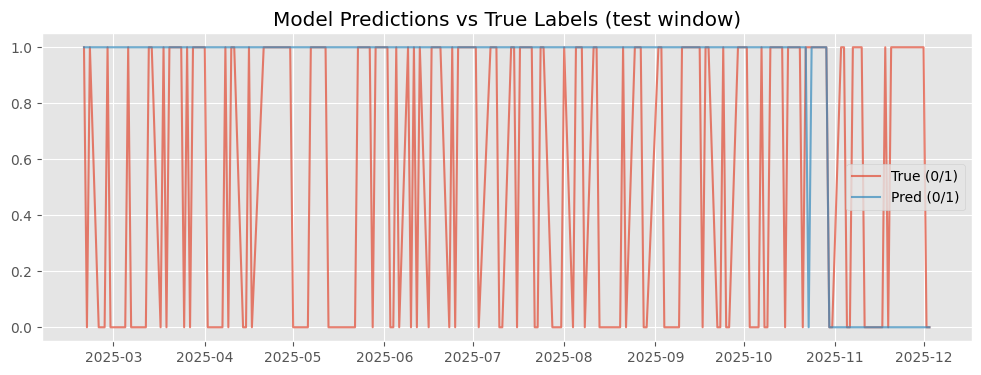

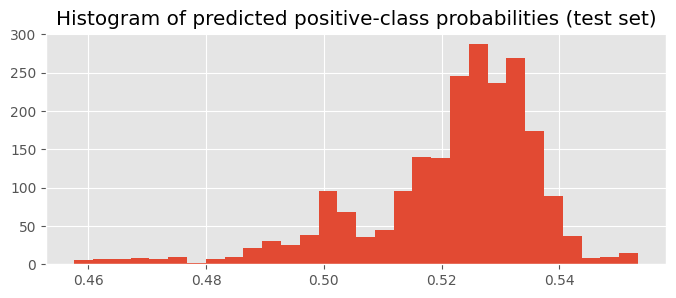

Phase C complete — model trained, best model saved to stock_transformer_best.pt


In [89]:
# ----------------------------
#  PHASE C : TRANSFORMER TRAINING
# ----------------------------
import math
import time
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

# =========== CONFIG ===========
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

SEQ_LEN = 60
INPUT_DIM = X_train_seq.shape[2]  # e.g., 41
MODEL_DIM = 128
NUM_HEADS = 4
FF_DIM = 256
NUM_LAYERS = 3
DROPOUT = 0.1
BATCH_SIZE = 64
EPOCHS = 20
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5
MODEL_SAVE_PATH = "stock_transformer_best.pt"
# ==============================


# --------------- MODEL ----------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=1000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        if d_model % 2 == 1:
            # handle odd dim
            pe[:, 1::2] = torch.cos(position * div_term[:-1])
        else:
            pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # x: (batch, seq_len, d_model)
        x = x + self.pe[:, : x.size(1), :].to(x.device)
        return x


class StockTransformer(nn.Module):
    def __init__(self, input_dim, model_dim=128, num_heads=4, ff_dim=256, num_layers=3, dropout=0.1, num_classes=2):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, model_dim)
        self.pos_enc = PositionalEncoding(model_dim, max_len=1024)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dim_feedforward=ff_dim, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.pool = nn.AdaptiveAvgPool1d(1)  # we'll transpose then pool
        self.classifier = nn.Sequential(
            nn.Linear(model_dim, model_dim//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(model_dim//2, num_classes)
        )

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        x = self.input_proj(x)               # (batch, seq_len, model_dim)
        x = self.pos_enc(x)
        x = self.transformer(x)              # (batch, seq_len, model_dim)
        # pool across time dimension
        x = x.permute(0, 2, 1)               # (batch, model_dim, seq_len)
        x = self.pool(x).squeeze(-1)         # (batch, model_dim)
        logits = self.classifier(x)          # (batch, num_classes)
        return logits


# Instantiate
model = StockTransformer(
    input_dim=INPUT_DIM,
    model_dim=MODEL_DIM,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT,
    num_classes=2
).to(device)

print("Model params:", sum(p.numel() for p in model.parameters() if p.requires_grad))


# --------------- LOSS, OPTIMIZER, SCHEDULER ----------------
# criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
# optional scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=3, factor=0.5
)

# --------------- HELPERS ----------------
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    preds_all = []
    labels_all = []
    for Xb, yb in loader:
        Xb = Xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * Xb.size(0)
        preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
        preds_all.append(preds)
        labels_all.append(yb.detach().cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    preds_all = np.concatenate(preds_all)
    labels_all = np.concatenate(labels_all)
    acc = accuracy_score(labels_all, preds_all)
    return epoch_loss, acc

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    preds_all = []
    labels_all = []
    logits_all = []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            yb = yb.to(device)
            logits = model(Xb)
            loss = criterion(logits, yb)
            running_loss += loss.item() * Xb.size(0)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            preds_all.append(preds)
            labels_all.append(yb.cpu().numpy())
            logits_all.append(torch.softmax(logits, dim=1).cpu().numpy())

    epoch_loss = running_loss / len(loader.dataset)
    preds_all = np.concatenate(preds_all)
    labels_all = np.concatenate(labels_all)
    logits_all = np.concatenate(logits_all)
    acc = accuracy_score(labels_all, preds_all)
    return epoch_loss, acc, preds_all, labels_all, logits_all


# --------------- DATA LOADERS (use existing) ----------------
# We assume train_loader and test_loader exist (from Phase B). If not, recreate them.
# train_loader, test_loader = ...
print("Train batches:", len(train_loader), "Test batches:", len(test_loader))


# --------------- TRAINING LOOP ----------------
best_val_loss = np.inf
best_epoch = -1
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

for epoch in range(1, EPOCHS + 1):
    t0 = time.time()
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, val_preds, val_labels, val_logits = evaluate(model, test_loader, criterion, device)

    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    scheduler.step(val_loss)

    elapsed = time.time() - t0
    print(f"Epoch {epoch:02d} | Train loss: {train_loss:.4f} acc: {train_acc:.4f} | Val loss: {val_loss:.4f} acc: {val_acc:.4f} | {elapsed:.1f}s")

    # Save best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save({
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "input_dim": INPUT_DIM,
            "model_dim": MODEL_DIM,
            "epoch": epoch
        }, MODEL_SAVE_PATH)
        print("Saved best model to", MODEL_SAVE_PATH)


print("Training finished. Best epoch:", best_epoch, "Best val loss:", best_val_loss)


# --------------- FINAL EVALUATION USING BEST MODEL ----------------
ckpt = torch.load(MODEL_SAVE_PATH, map_location=device)
model.load_state_dict(ckpt["model_state_dict"])
model.to(device)

val_loss, val_acc, val_preds, val_labels, val_logits = evaluate(model, test_loader, criterion, device)
print("\nFINAL TEST LOSS:", val_loss, "ACC:", val_acc)

# Confusion matrix + classification report
cm = confusion_matrix(val_labels, val_preds)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(val_labels, val_preds, digits=4))


# --------------- TREND PLOT (Pred vs True) ----------------
# We'll plot a sample window of test set predictions vs true labels.
# Reconstruct day indices for the test set to align predictions with dates.
# NOTE: this assumes you used chronological split and sequence creation from Phase B.

# Build arrays of test dates that correspond to y_test_seq entries:
# If you kept original df and train_size, the first test label corresponds to index train_size + SEQ_LEN
train_size = int(0.8 * len(df))
test_label_start_idx = train_size + SEQ_LEN
test_dates = pd.to_datetime(df.index[test_label_start_idx : test_label_start_idx + len(val_labels)])

# Convert preds & labels to series aligned with dates
pred_series = pd.Series(val_preds, index=test_dates)
true_series = pd.Series(val_labels, index=test_dates)

# Plot a window (e.g., last 200 samples)
window = 200 if len(pred_series) > 200 else len(pred_series)
start = len(pred_series) - window
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(true_series.iloc[start:].index, true_series.iloc[start:].values, label="True (0/1)", alpha=0.7)
ax.plot(pred_series.iloc[start:].index, pred_series.iloc[start:].values, label="Pred (0/1)", alpha=0.7)
ax.set_title("Model Predictions vs True Labels (test window)")
ax.legend()
plt.show()


# --------------- PROBABILITIES & THRESHOLD (optional) ----------------
# You can inspect positive-class probability and tune thresholds if needed.
pos_probs = val_logits[:, 1]
plt.figure(figsize=(8,3))
plt.hist(pos_probs, bins=30)
plt.title("Histogram of predicted positive-class probabilities (test set)")
plt.show()

# --------------- DONE ----------------
print("Phase C complete — model trained, best model saved to", MODEL_SAVE_PATH)


In [88]:
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn
import numpy as np

# Compute class weights using training labels only
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
print("Class weights:", class_weights)

Class weights: tensor([0.9848, 1.0156])


<Axes: xlabel='Date'>

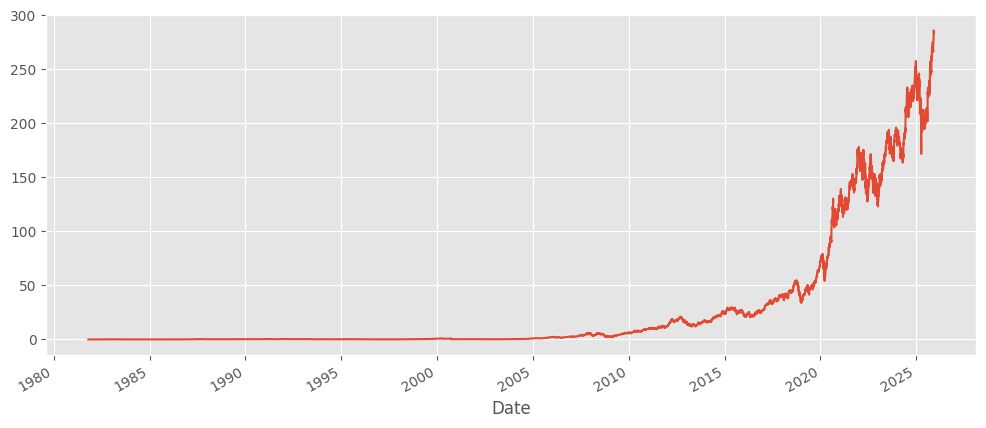

In [91]:
ts = df['Close']
ts.plot(figsize=(12,5))


In [93]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 2.3 MB/s  0:00:04eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [94]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 4.1983485492081085
p-value: 1.0


In [95]:
ts_diff = ts.diff().dropna()


In [96]:
adfuller(ts_diff)


(np.float64(-16.333874845350632),
 np.float64(3.042149879676681e-29),
 38,
 11078,
 {'1%': np.float64(-3.4309404329213504),
  '5%': np.float64(-2.861800939025566),
  '10%': np.float64(-2.5669088927212154)},
 np.float64(33833.907764745105))

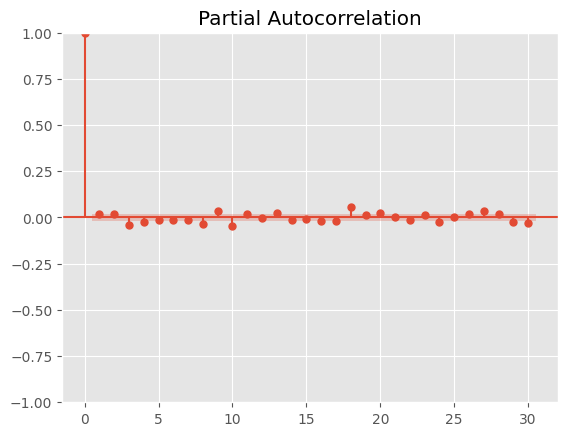

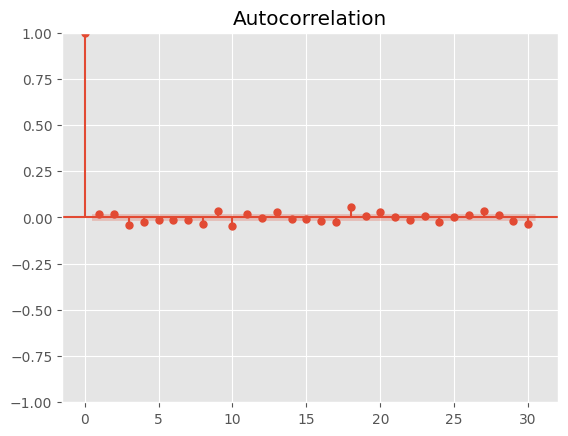

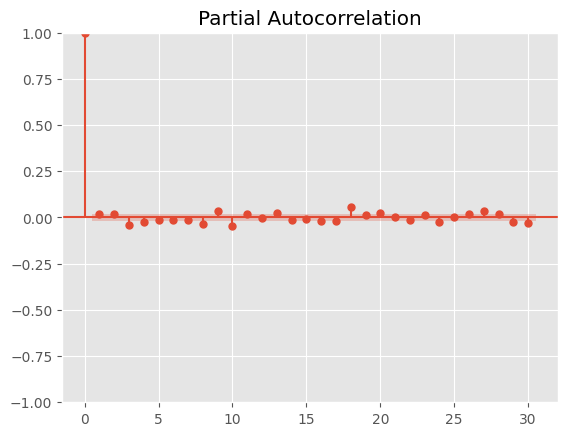

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)


In [98]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()


NameError: name 'p' is not defined

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11118 entries, 1981-10-23 to 2025-12-03
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  11118 non-null  float64
 1   High                   11118 non-null  float64
 2   Low                    11118 non-null  float64
 3   Open                   11118 non-null  float64
 4   Volume                 11118 non-null  int64  
 5   Returns                11118 non-null  float64
 6   Returns_log            11118 non-null  float64
 7   SMA_10                 11118 non-null  float64
 8   SMA_50                 11118 non-null  float64
 9   MA50                   11118 non-null  float64
 10  MA200                  11118 non-null  float64
 11  Volatility             11118 non-null  float64
 12  Volume_change          11118 non-null  float64
 13  Volume_norm            11118 non-null  float64
 14  EMA_12                 11118 non-null

In [103]:
p = 1
d=1
q = 1
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


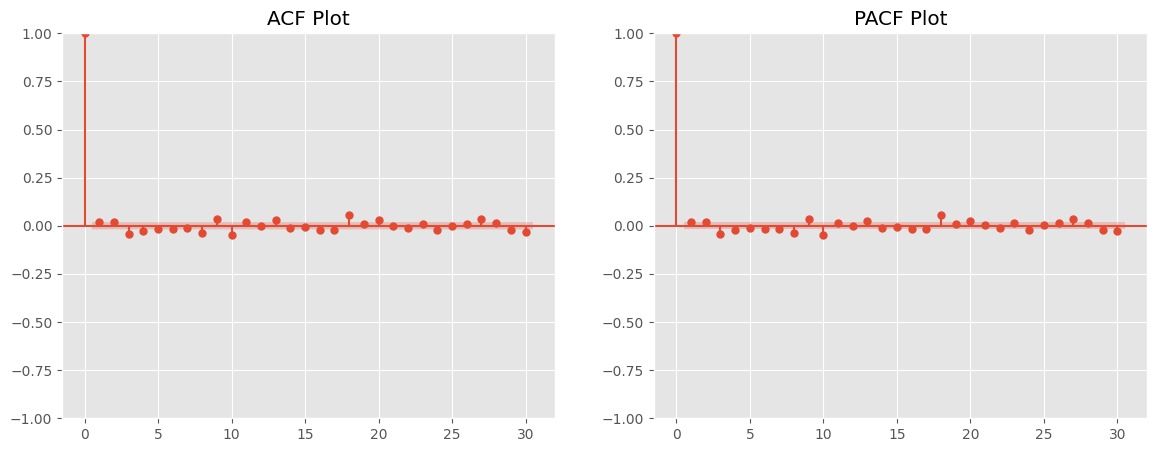

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14,5))

plot_acf(ts_diff, lags=30, ax=ax[0])
ax[0].set_title("ACF Plot")

plot_pacf(ts_diff, lags=30, ax=ax[1])
ax[1].set_title("PACF Plot")

plt.show()


In [106]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(0, 1, 0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                11118
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -17041.846
Date:                Tue, 30 Dec 2025   AIC                          34085.691
Time:                        14:15:54   BIC                          34093.007
Sample:                             0   HQIC                         34088.155
                              - 11118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2562      0.003    434.750      0.000       1.251       1.262
Ljung-Box (L1) (Q):                   4.14   Jarque-Bera (JB):           2019839.26
Prob(Q):                              0.04   Pr

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [108]:
pred = model_fit.predict(start=1, end=len(ts)-1)


In [109]:
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]


In [110]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(0,1,0))
model_fit = model.fit()


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


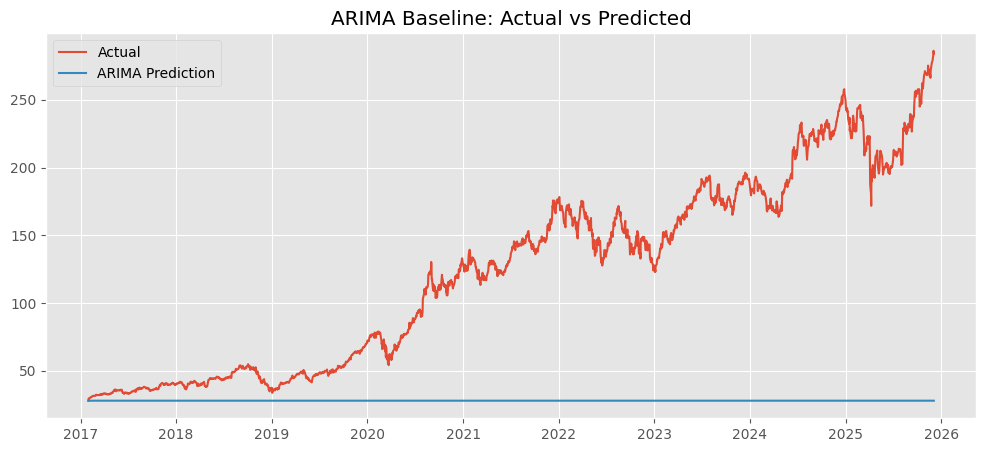

In [111]:
pred = model_fit.forecast(steps=len(test))
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, pred, label="ARIMA Prediction")
plt.legend()
plt.title("ARIMA Baseline: Actual vs Predicted")
plt.show()


In [112]:
import numpy as np

actual_dir = np.sign(test.diff().dropna())
pred_dir = np.sign(pred.diff().dropna())


In [113]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_dir[1:], pred_dir[1:])
print("ARIMA Direction Accuracy:", accuracy)


ARIMA Direction Accuracy: 0.0022502250225022503


In [114]:
returns = ts.pct_change().dropna()

train_size = int(len(returns) * 0.8)
train, test = returns[:train_size], returns[train_size:]


In [115]:
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()

pred = model_fit.forecast(steps=len(test))


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

In [116]:
actual_dir = np.sign(test)
pred_dir = np.sign(pred)

accuracy = accuracy_score(actual_dir, pred_dir)
print("ARIMA Direction Accuracy:", accuracy)


ARIMA Direction Accuracy: 0.5377697841726619


In [1]:
ts = df['Close']
ts.index = pd.to_datetime(df['Date'])
ts = ts.asfreq('B')  # Business days
ts = ts.fillna(method='ffill')


NameError: name 'df' is not defined

In [2]:
import pandas as pd

df = pd.read_csv("AAPL_daily_full_history.csv")
df.columns


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [3]:
import pandas as pd

ts = df['Close']

# If your dataframe already has a Date index, skip next line
ts.index = pd.to_datetime(df.index)

# Set business-day frequency (important for ARIMA/SARIMA)
ts = ts.asfreq('B')

# Fill missing days
ts = ts.fillna(method='ffill')


/var/folders/s_/hq70jn3x3hjgsjyrw1ggnqbr0000gn/T/ipykernel_11145/1018188788.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.fillna(method='ffill')


In [4]:
ts.head(), ts.tail()


(1970-01-01    AAPL
 Freq: B, Name: Close, dtype: object,
 1970-01-01    AAPL
 Freq: B, Name: Close, dtype: object)